# Project 3

Use neural network (Deep Learning) to predict the heating and cooling load of the building. 
For this project you need to use some base Regression models and ensemble and compare r2_score. 
Adding cooling load and heating load can define the overall load of the apartment. Study the trend of overall load and divide it into three classes, low efficient, high efficient and average efficient. Then train a deep learning model to predict the label. 


<img src="HeatingCooling.jpg" width="500px" height="500px">


## INDEX 

### [1. Retrieving packages](#Package)
### [2. Exploratory Analysis](#Explo)
In this section we've explored the correlation between variables and created histograms and scatterplots of the dependent and independent variables.
>### [2.1. Correlation Matrix](#Correlation)
>### [2.2. Histograms](#Histograms)
>### [2.3. Scatter](#Scatter)

### [3. Data Preparation for modelling](#Prep)
In this section we've created categorical variables for cooling and heating, created the train and test set and scaled the data.
>### [3.1. Categorical variables](#Categorical)
For the categorical variables we've divided into three sections: 1/3 of bottom range (high efficient), 1/3 of medium range (average load) and 1/3 of the top range (low efficient)  

>### [3.2. Train-Test split](#TrainTest)
>### [3.3. Scaling](#Scaling)


### [4. Modelling with Supervised Algorithms for regression](#ModSup)

In this section, we've chosen four Supervised Algorithms for regression such as Linear, Lasso, Random Forest Regression and Adaboost Lasso.
> ### [4.1. Linear Regression](#Linear)
>> #### [4.1.1. Linear Regression for Heating](#LinearHeat)
>> #### [4.1.2. Linear Regression for Cooling](#LinearCool)
>> #### [4.1.3. Linear Regression Overall](#LinearOver)

> ### [4.2. Lasso Regression](#Lasso)
>> #### [4.2.1. Lasso Regression for Heating](#LassoHeat)
>> #### [4.2.2. Lasso Regression for Cooling](#LassoCool)
>> #### [4.2.3. Lasso Regression Overall](#LassoOver)


> ### [4.3. Random Forest Regression](#RandomReg)
>> #### [4.3.1. Random Forest Regression for Heating](#RfregHeat)
>> #### [4.3.2. Random Forest Regression for Cooling](#RfregCool)
>> #### [4.3.3. Random Forest Regression Overall](#RfregOver)



> ### [4.4. Adaboost Lasso](#AdaboostReg)
>> #### [4.4.1. Adaboost Lasso for Heating](#AdaLassoHeat)
>> #### [4.4.2. Adaboost Lasso for Cooling](#AdaLassoCool)
>> #### [4.4.3. Adaboost Lasso Overall](#AdaLassoOver)


### [5. Modelling with Supervised Algorithms for classification](#ModClass)

In this section, we've chosen 4 Supervised Algorithms for classification such as Decision Tree, Support Vector Classification, Random Forest and Gradient Boosting.
> ### [5.1. Decision Tree](#Tree)
>> #### [5.1.1. Decision Tree Classification for heating](#TreeHeat)
>> #### [5.1.2. Random Forest Regression for Cooling](#TreeCool)
>> #### [5.1.3. Random Forest Regression for Overall](#TreeOver)


> ### [5.2. Suppor Vector Classification](#SVC)
>> #### [5.2.1. SVC for heating](#SVCHeat)
>> #### [5.2.2. SVC for Cooling](#SVCCool)
>> #### [5.2.3. SVC for Overall](#SVCOver)

> ### [5.3. Random Forest  Classification](#RandomClass)
>> #### [5.3.1. Random Forest for heating](#RandomHeat)
>> #### [5.3.2. Random Forest for Cooling](#RandomCool)
>> #### [5.3.3. Random Forest for Overall](#RandomOver)


> ### [5.4. Gradient Boost](#Gradient)
>> #### [5.4.1. Gradient Boost for heating](#GradientHeat)
>> #### [5.4.2. Gradient Boost for Cooling](#GradientCool)
>> #### [5.4.3. Gradient Boost for Overall](#GradientOver)


### [6. Modelling with Deep Learning-Dependent variable continuous](#ModDeep)
In this section we've applied Deep Learning using "Overall load", "Heating load" and "Cooling load" as continuous variables.
> ### [6.1. Defining the model](#Deep11)
> ### [6.2. Compiling the model](#Deep12)
> ### [6.3. Fitting and evaluating the model for overall load](#Deep13)
> ### [6.4. Fitting and evaluating the model for heating](#Deep14)
> ### [6.4. Fitting and evaluating the model for cooling](#Deep15)

### [7. Modelling with Deep Learning-Dependent variable categorical](#ModDeep2)
In this section we've applied Deep Learning using "Overall load", "Heating load" and "Cooling load" as categorica variables. In that sense, we've divided in three categories: range low, range high and range efficient
> ### [7.1. Defining the model](#Deep21)
> ### [7.2. Compiling the model](#Deep22)
> ### [7.3. Fitting and evaluating the model for overall load](#Deep23)
> ### [7.4. Fitting and evaluating the model for heating](#Deep24)
> ### [7.5. Fitting and evaluating the model for cooling](#Deep25)

### [8. Final reports and conclusions](#Final)

> ### [8.1 Comparing algoritms with continuos dependent variable](#Final1)
> ### [8.2 Comparing algoritms with categorical dependent variable](#Final2)
> ### [8.3 Compare R2 score with bagging](#Final3)
> ### [8.2 Conclusions](#Final4)

## 1. Retrieving packages
<a id="Package"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#For Linear regression models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, BaggingClassifier

#For Classification models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

#For deep learning models
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

#For evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, roc_auc_score,  auc, confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

/Users/lana/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
energy=pd.read_csv("ENB2012_data.csv")

## 2. Exploratory Analysis
<a id="Explo"></a>

In [4]:
energy.shape

(768, 10)

In [5]:
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
#Renaiming the columns
energy2=energy.rename(columns={"X1":"Compactness", "X2":"SurfaceA", "X3":"WallA", "X4":"RoofA",
                      "X5":"Height", "X6":"Orientation", "X7":"GlazingA",
                      "X8":"GlazingDist", "Y1":"Heating", "Y2":"Cooling"})

In [7]:
energy2['Overall']=energy2['Heating']+energy2['Cooling']

In [8]:
energy2.describe()

,Compactness,SurfaceA,WallA,RoofA,Height,Orientation,GlazingA,GlazingDist,Heating,Cooling,Overall
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760,46.894961
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306,19.484947
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000,16.950000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000,28.750000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000,40.970000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500,64.335000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000,89.950000


## 2.1 Correlation Matrix
<a id="Correlation"></a>

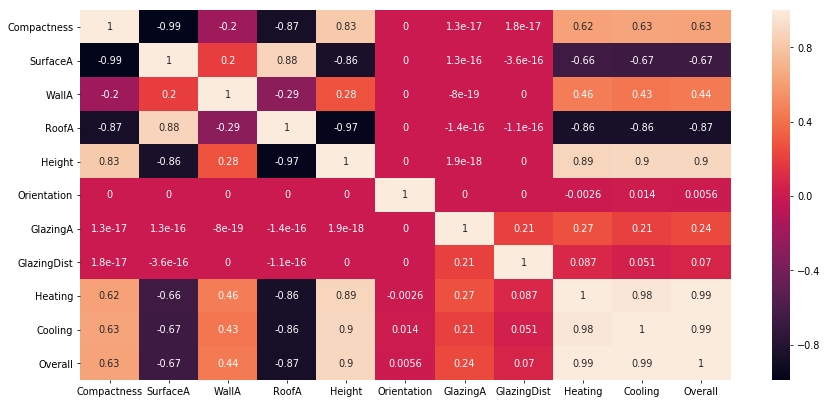

In [9]:
plt.figure(figsize=(15,7), dpi=70)
sns.heatmap(energy2.corr(), annot=True)

## 2.2 Histograms

<a id="Histograms"></a>

#### Histogram of Heating Load and Cooling load

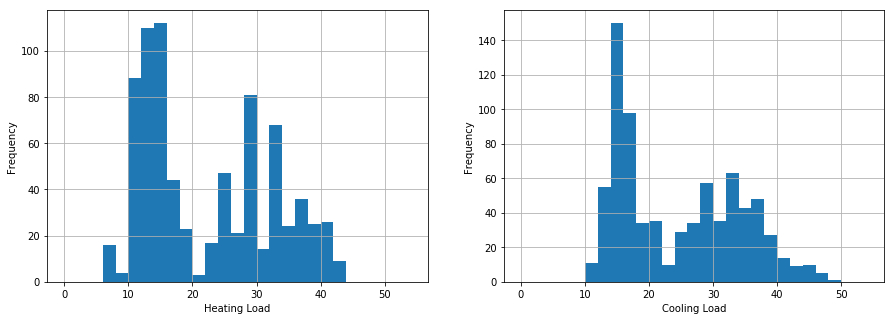

In [10]:
fig, ax =plt.subplots(1, 2, figsize=(15,5))
bins = list(range(0,55,2))
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[0].hist(energy2['Heating'], bins)
ax[0].set_xlabel('Heating Load')
ax[0].set_ylabel('Frequency')
ax[0].grid()

ax[1]=plt.subplot2grid((1,2),(0,1))
ax[1].hist(energy2['Cooling'], bins)
ax[1].set_xlabel('Cooling Load')
ax[1].set_ylabel('Frequency')
ax[1].grid()


##### Histogram and Bocplot Overall load

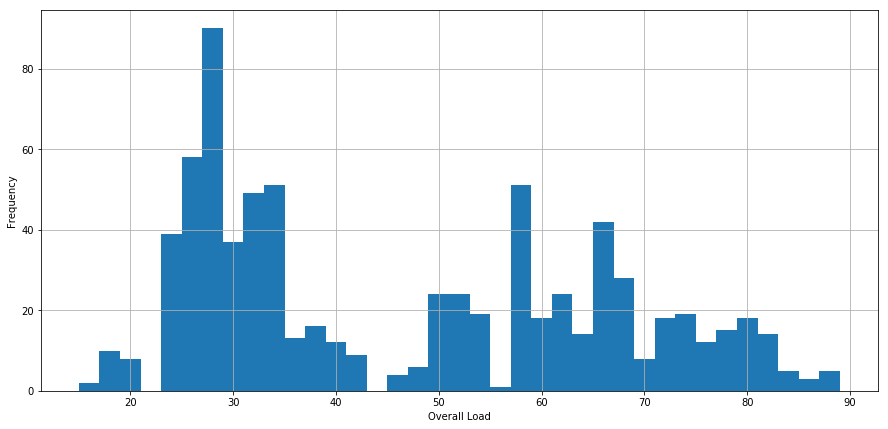

In [11]:
fig, ax =plt.subplots(figsize=(15,7))
bins = list(range(15,90,2))
ax.hist(energy2['Overall'], bins)
ax.set_xlabel('Overall Load')
ax.set_ylabel('Frequency')
ax.grid()

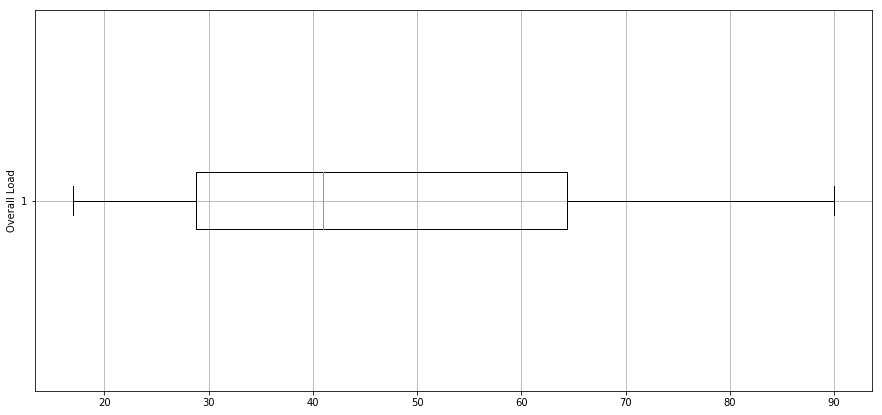

In [12]:
fig, ax =plt.subplots(figsize=(15,7))
ax.boxplot(energy2['Overall'], vert= 0)
ax.set_ylabel('Overall Load')
ax.grid()

#### Histogram Input  Variables

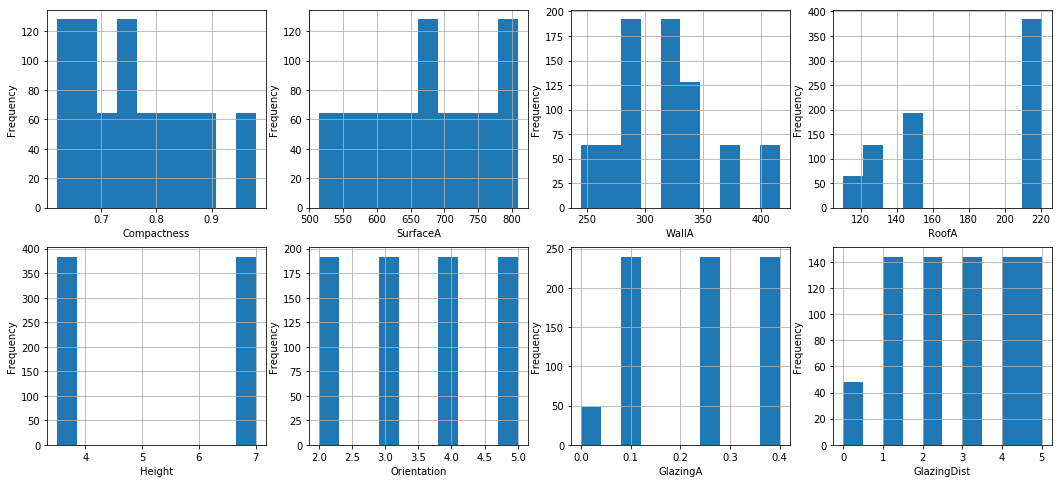

In [13]:
fig, ax =plt.subplots(2, 4, figsize=(18,8))
ax = ax.flatten()
for i in list(range(0,8)):
    ax[i].hist(energy2.iloc[:,i])
    ax[i].grid()
    ax[i].set_xlabel(energy2.columns[i])
    ax[i].set_ylabel('Frequency')

## 2.3 Scatterplots
<a id="Scatter"></a>

#### Scatterplots for heating

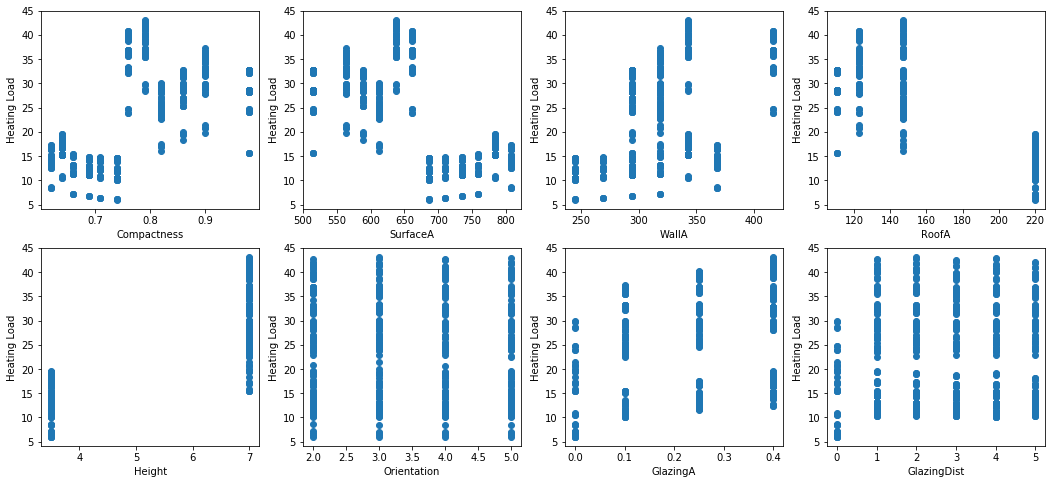

In [14]:
fig, ax =plt.subplots(2, 4, figsize=(18,8))
ax = ax.flatten()
i=0
for i in list(range(0,8)):
    ax[i].plot(energy2.iloc[:,i], energy2['Heating'], 'o')
    ax[i].set_xlabel(energy2.columns[i])
    ax[i].set_ylabel('Heating Load')
    i=i+1

#### Scatterplots for cooling

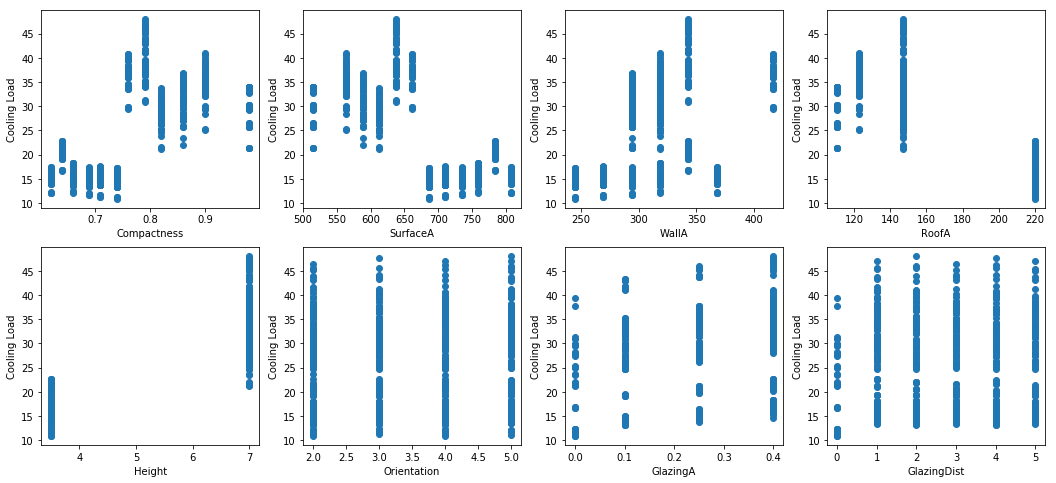

In [15]:
fig, ax =plt.subplots(2, 4, figsize=(18,8))
ax = ax.flatten()
i=0
for i in list(range(0,8)):
    ax[i].plot(energy2.iloc[:,i], energy2['Cooling'], 'o')
    ax[i].set_xlabel(energy2.columns[i])
    ax[i].set_ylabel('Cooling Load')
    i=i+1

## 3. Data Preparation for modelling

<a id="Prep"></a>

## 3.1 Creating categorical variables

<a id="Categorical"></a>

##### Creating categorical variable for overall load

In [16]:
def divide_overall (todo):
    range_todo=energy2['Overall'].max()-energy2['Overall'].min()
    if todo <= range_todo*1/3:
        return 0
    elif todo >= range_todo*2/3:
        return 2
    else:
        return 1

In [17]:
energy2["Overall_Cat"]=energy2["Overall"].map(divide_overall)
energy2.Overall_Cat=energy2.Overall_Cat.astype("category")

Overall_Cat
0     43
1    359
2    366
Name: Overall_Cat, dtype: int64


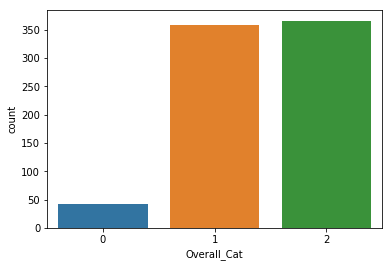

In [18]:
print(energy2.groupby(['Overall_Cat'])['Overall_Cat'].count())
sns.countplot(x='Overall_Cat', data=energy2)

#### Creating categorical variables for heating

In [19]:
def divide_heating (calor):
    range_calor=energy2['Heating'].max()-energy2['Heating'].min()
    if calor <= range_calor*1/3:
        return 0
    elif calor >= range_calor*2/3:
        return 2
    else:
        return 1

In [20]:
energy2['Heat_Cat']=energy2['Heating'].map(divide_heating)
energy2.Heat_Cat=energy2.Heat_Cat.astype("category")

Heat_Cat
0    135
1    309
2    324
Name: Heat_Cat, dtype: int64


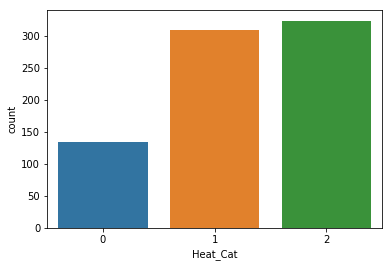

In [21]:
print(energy2.groupby(['Heat_Cat'])['Heat_Cat'].count())
sns.countplot(x='Heat_Cat', data=energy2)

#### Creating categorical variables for cooling

In [22]:
def divide_cooling (frio):
    range_frio=energy2['Cooling'].max()-energy2['Cooling'].min()
    if frio <= range_frio*1/3:
        return 0
    elif frio >= range_frio*2/3:
        return 2
    else:
        return 1

In [23]:
energy2['Cool_Cat']=energy2['Cooling'].map(divide_heating)
energy2.Cool_Cat=energy2.Cool_Cat.astype("category")

Cool_Cat
0     18
1    377
2    373
Name: Cool_Cat, dtype: int64


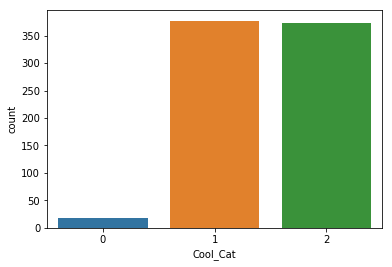

In [24]:
print(energy2.groupby(['Cool_Cat'])['Cool_Cat'].count())
sns.countplot(x='Cool_Cat', data=energy2)

#### X and y from original dataframe

In [25]:
X=energy2.loc[:,["Compactness", "SurfaceA", "WallA", "RoofA","Height",  "Orientation", "GlazingA",
                "GlazingDist"]]
y1=energy2.loc[:,["Heating"]]
y2=energy2.loc[:,["Cooling"]]
yoverall=energy2.loc[:,["Overall"]]

#### X and y from categorical generated variables

In [26]:
Xcat=energy2.loc[:,["Compactness", "SurfaceA", "WallA", "RoofA","Height",  "Orientation", "GlazingA",
                "GlazingDist"]]
y1_cat=energy2.loc[:,["Heat_Cat"]]
y2_cat=energy2.loc[:,["Cool_Cat"]]
yoverall_cat=energy2.loc[:,["Overall_Cat"]]

## 3.2 Train test split

<a id="TrainTest"></a>

#### For overall continuous dependent variable

In [27]:
Xtraino, Xtesto, ytraino, ytesto=train_test_split(X, yoverall, random_state=20)

In [28]:
print("The shape of X is:", X.shape)
print("The shape of Xtrain is: ", Xtraino.shape)
print("The shape of Xtest is:", Xtesto.shape)

The shape of X is: (768, 8)
The shape of Xtrain is:  (576, 8)
The shape of Xtest is: (192, 8)


##### For heating with continuous dependent variable

In [29]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y1, random_state=20, test_size=0.2)

In [30]:
print("The shape of X is:", X.shape)
print("The shape of Xtrain is: ", Xtrain.shape)
print("The shape of Xtest is:", Xtest.shape)

The shape of X is: (768, 8)
The shape of Xtrain is:  (614, 8)
The shape of Xtest is: (154, 8)


##### For cooling for continuous dependent variable

In [31]:
Xtrain2, Xtest2, ytrain2, ytest2=train_test_split(X, y2, random_state=20, test_size=0.2)

In [32]:
print("The shape of X is:", X.shape)
print("The shape of Xtrain is: ", Xtrain2.shape)
print("The shape of Xtest is:", Xtest2.shape)

The shape of X is: (768, 8)
The shape of Xtrain is:  (614, 8)
The shape of Xtest is: (154, 8)


#### For overall categorical dependent variable

In [33]:
Xtraino_cat, Xtesto_cat, ytraino_cat, ytesto_cat=train_test_split(X, yoverall_cat,random_state=20)

In [34]:
print("The shape of X is:", X.shape)
print("The shape of Xtrain is: ", Xtraino_cat.shape)
print("The shape of Xtest is:", Xtesto_cat.shape)

The shape of X is: (768, 8)
The shape of Xtrain is:  (576, 8)
The shape of Xtest is: (192, 8)


##### For heating with categorical dependent variable

In [35]:
Xtrain3, Xtest3, ytrain3, ytest3=train_test_split(X, y1_cat, random_state=20, test_size=0.2)

In [36]:
print("The shape of X is:", X.shape)
print("The shape of Xtrain is: ", Xtrain3.shape)
print("The shape of Xtest is:", Xtest3.shape)
print("The shape of ytrain is", ytrain3.shape)

The shape of X is: (768, 8)
The shape of Xtrain is:  (614, 8)
The shape of Xtest is: (154, 8)
The shape of ytrain is (614, 1)


##### For cooling for categorical dependent variable

In [37]:
Xtrain4, Xtest4, ytrain4, ytest4=train_test_split(X, y2_cat, random_state=20, test_size=0.2)

In [38]:
print("The shape of X is:", X.shape)
print("The shape of Xtrain is: ", Xtrain4.shape)
print("The shape of Xtest is:", Xtest4.shape)

The shape of X is: (768, 8)
The shape of Xtrain is:  (614, 8)
The shape of Xtest is: (154, 8)


## 3.3 Scaling

<a id="Scaling"></a>

##### Scaling for overall load  continuos dependent variable

In [39]:
scale_o=MinMaxScaler()
Xtraino_mms=scale_o.fit_transform(Xtraino)
Xtesto_mms=scale_o.transform(Xtesto)

##### Scaling for heating for continuos dependent variable

In [40]:
scale1=MinMaxScaler()
Xtrain_mms=scale1.fit_transform(Xtrain)
Xtest_mms=scale1.transform(Xtest)

##### Scaling for cooling for continuos dependent variable

In [41]:
scale2=MinMaxScaler()
Xtrain2_mms=scale2.fit_transform(Xtrain2)
Xtest2_mms=scale2.transform(Xtest2)

##### Scaling for overall load  categorical dependent variable

In [42]:
scale_ocat=MinMaxScaler()
Xtraino_cat_mms=scale_ocat.fit_transform(Xtraino_cat)
Xtesto_cat_mms=scale_ocat.transform(Xtesto_cat)

##### Scaling for heating for categorical dependent variable

In [43]:
scale3=MinMaxScaler()
Xtrain3_mms=scale3.fit_transform(Xtrain3)
Xtest3_mms=scale3.transform(Xtest3)

##### Scaling for cooling for categorical dependent variable

In [44]:
scale4=MinMaxScaler()
Xtrain4_mms=scale4.fit_transform(Xtrain4)
Xtest4_mms=scale4.transform(Xtest4)

## 4. Modelling with Supervised Algorithms for Regression
<a id="ModSup"></a>

## 4.1 Linear Regression

<a id="Linear"></a>

### 4.1.1 Linear Regression for Heating

<a id="LinearHeat"></a>

In [45]:
linreg_heating=LinearRegression()
linreg_heating.fit(Xtrain_mms, ytrain)
ytestpredict_linreg_heating=linreg_heating.predict(Xtest_mms)

In [46]:
print("Results linear regression")
print("linear model intercept: {}".format(linreg_heating.intercept_))
print("Linear model coefficients: {}".format(linreg_heating.coef_))
print('R-squared score Linear Regression Heating(training): {:.5f}'
     .format(linreg_heating.score(Xtrain_mms, ytrain)))
print('R-squared score Linear Regression Heating (test): {:.5f}'
     .format(linreg_heating.score(Xtest_mms, ytest)))

Results linear regression
linear model intercept: [31.02997776]
Linear model coefficients: [[-23.61240767  -8.81980983   0.32882635 -12.01550026  15.40724465
   -0.05119371   7.50905536   0.90511064]]
R-squared score Linear Regression Heating(training): 0.91927
R-squared score Linear Regression Heating (test): 0.90125


### 4.1.2 Linear Regression for Cooling
<a id="LinearCool"></a>

In [47]:
linreg_cooling=LinearRegression()
linreg_cooling.fit(Xtrain2_mms, ytrain2)
ytestpredict_linreg_cooling=linreg_cooling.predict(Xtest2_mms)

In [48]:
print("Results linear regression")
print("linear model intercept: {}".format(linreg_cooling.intercept_))
print("Linear model coefficients: {}".format(linreg_cooling.coef_))
print('R-squared score Linear Regression cooling (training): {:.5f}'
     .format(linreg_cooling.score(Xtrain_mms, ytrain)))
print('R-squared score Linear Regression cooling (test): {:.5f}'
     .format(linreg_cooling.score(Xtest_mms, ytest)))

Results linear regression
linear model intercept: [35.28287172]
Linear model coefficients: [[-2.46722123e+01 -9.16246585e+00 -1.78309920e+00 -1.08297662e+01
   1.60919203e+01  3.94890726e-01  5.42375680e+00  1.28761414e-03]]
R-squared score Linear Regression cooling (training): 0.85819
R-squared score Linear Regression cooling (test): 0.80979


### 4.1.3 Linear Regression for Overall
<a id="LinearOver"></a>

In [49]:
linreg_overall=LinearRegression()
linreg_overall.fit(Xtraino_mms, ytraino)
ytestpredict_linreg_overall=linreg_overall.predict(Xtesto_mms)

In [50]:
print("Results linear regression")
print("linear model intercept: {}".format(linreg_overall.intercept_))
print("Linear model coefficients: {}".format(linreg_overall.coef_))
print('R-squared score Liner Regression overall(training): {:.5f}'
     .format(linreg_overall.score(Xtraino_mms, ytraino)))
print('R-squared score Linear Regression overall (test): {:.5f}'
     .format(linreg_overall.score(Xtesto_mms, ytesto)))

Results linear regression
linear model intercept: [65.71797623]
Linear model coefficients: [[-48.26144615 -17.73309099  -1.33148283 -22.60852357  31.81182151
    0.41944166  13.04409428   0.94520239]]
R-squared score Liner Regression overall(training): 0.91360
R-squared score Linear Regression overall (test): 0.90419


## 4.2 Lasso Regression

<a id="Lasso"></a>

### 4.2.1 Lasso Regression for Heating
<a id="LassoHeat"></a>

In [51]:
auxLasso_heating=Lasso()

lassoparam_heating={"alpha":[0.5,1,2,3,5,10,20,50],
           "max_iter":[100,1000, 10000]}

grid_lasso_heating=GridSearchCV(auxLasso_heating, lassoparam_heating, cv=5)
grid_lasso_heating.fit(Xtrain_mms, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.5, 1, 2, 3, 5, 10, 20, 50], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
print("Best K: {}".format(grid_lasso_heating.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lasso_heating.best_score_))
print("Best estimator:\n{}".format(grid_lasso_heating.best_estimator_))

Best K: {'alpha': 0.5, 'max_iter': 100}
Best cross-validation score: 0.8487
Best estimator:
Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [53]:
lasso_heating=Lasso(alpha=0.5, max_iter=100)
lasso_heating.fit(Xtrain_mms, ytrain)

ytestpredict_lasso_heating=lasso_heating.predict(Xtest_mms)

print('Energy Optimization')
print('lasso regression linear model intercept: {}'
     .format(lasso_heating.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(lasso_heating.coef_))
print('Non-zero features: {}'
     .format(np.sum(lasso_heating.coef_ != 0)))
print('R-squared score Lasso Heating (training): {:.5f}'
     .format(lasso_heating.score(Xtrain_mms, ytrain)))
print('R-squared score Lasso Heating (test): {:.5f}\n'
     .format(lasso_heating.score(Xtest_mms, ytest)))


Energy Optimization
lasso regression linear model intercept: [11.9210448]
lasso regression linear model coeff:
[-0.          0.          1.76571046 -0.         15.88844016 -0.
  3.04377231  0.        ]
Non-zero features: 3
R-squared score Lasso Heating (training): 0.85087
R-squared score Lasso Heating (test): 0.81380



In [54]:
#Selecting the featured variables
for e in sorted (list(zip(list(Xtrain), lasso_heating.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.2f}'.format(e[0], e[1]))

	Height, 15.89
	GlazingA, 3.04
	WallA, 1.77


### 4.2.2 Lasso Regression for Cooling
<a id="LassoCool"></a>

In [55]:
auxLasso_cooling=Lasso()

lassoparam_cooling={"alpha":[0.5,1,2,3,5,10,20,50],
           "max_iter":[100,1000, 10000]}

grid_lasso_cooling=GridSearchCV(auxLasso_cooling, lassoparam_cooling, cv=5)
grid_lasso_cooling.fit(Xtrain2_mms, ytrain2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.5, 1, 2, 3, 5, 10, 20, 50], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
print("Best K: {}".format(grid_lasso_cooling.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lasso_cooling.best_score_))
print("Best estimator:\n{}".format(grid_lasso_cooling.best_estimator_))

Best K: {'alpha': 0.5, 'max_iter': 100}
Best cross-validation score: 0.8103
Best estimator:
Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [57]:
lasso_cooling=Lasso(alpha=0.5, max_iter=100)
lasso_cooling.fit(Xtrain2_mms, ytrain2)

ytestpredict_lasso_cooling=lasso_cooling.predict(Xtest2_mms)

print('Energy Optimization')
print('lasso regression linear model intercept: {}'
     .format(lasso_cooling.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(lasso_cooling.coef_))
print('Non-zero features: {}'
     .format(np.sum(lasso_cooling.coef_ != 0)))
print('R-squared score Lasso cooling (training): {:.5f}'
     .format(lasso_cooling.score(Xtrain2_mms, ytrain2)))
print('R-squared score Lasso cooling (test): {:.5f}\n'
     .format(lasso_cooling.score(Xtest2_mms, ytest2)))


Energy Optimization
lasso regression linear model intercept: [16.61123697]
lasso regression linear model coeff:
[-0.00000000e+00  0.00000000e+00  4.44070663e-03 -0.00000000e+00
  1.52164391e+01  0.00000000e+00  8.07605511e-01  0.00000000e+00]
Non-zero features: 3
R-squared score Lasso cooling (training): 0.81239
R-squared score Lasso cooling (test): 0.76976



In [58]:
#Selecting the featured variables
for e in sorted (list(zip(list(Xtrain2), lasso_cooling.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.2f}'.format(e[0], e[1]))

	Height, 15.22
	GlazingA, 0.81
	WallA, 0.00


### 4.2.3 Lasso Regression for Overall
<a id="LassoOver"></a>

In [59]:
auxLasso_overall=Lasso()

lassoparam_overall={"alpha":[0.5,1,2,3,5,10,20,50],
           "max_iter":[100,1000, 10000]}

grid_lasso_overall=GridSearchCV(auxLasso_overall, lassoparam_overall, cv=5)
grid_lasso_overall.fit(Xtraino_mms, ytraino)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.5, 1, 2, 3, 5, 10, 20, 50], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
print("Best K: {}".format(grid_lasso_overall.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lasso_overall.best_score_))
print("Best estimator:\n{}".format(grid_lasso_overall.best_estimator_))

Best K: {'alpha': 0.5, 'max_iter': 100}
Best cross-validation score: 0.8867
Best estimator:
Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [61]:
lasso_overall=Lasso(alpha=0.5, max_iter=100)
lasso_overall.fit(Xtraino_mms, ytraino)

ytestpredict_lasso_overall=lasso_overall.predict(Xtesto_mms)

print('Energy Optimization')
print('lasso regression linear model intercept: {}'
     .format(lasso_overall.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(lasso_overall.coef_))
print('Non-zero features: {}'
     .format(np.sum(lasso_overall.coef_ != 0)))
print('R-squared score Lasso overall (training): {:.5f}'
     .format(lasso_overall.score(Xtraino_mms, ytraino)))
print('R-squared score Lasso overall (test): {:.5f}\n'
     .format(lasso_overall.score(Xtesto_mms, ytesto)))


Energy Optimization
lasso regression linear model intercept: [22.1087299]
lasso regression linear model coeff:
[-0.          0.          9.01625178 -0.         31.96460868  0.
  8.68551012  0.        ]
Non-zero features: 3
R-squared score Lasso overall (training): 0.88891
R-squared score Lasso overall (test): 0.87799



In [62]:
#Selecting the featured variables
for e in sorted (list(zip(list(Xtraino), lasso_overall.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.2f}'.format(e[0], e[1]))

	Height, 31.96
	WallA, 9.02
	GlazingA, 8.69


## 4.3 Random Forest Regression

<a id="RandomReg"></a>

### 4.3.1 Random Forest Regression for Heating
<a id="RfregHeat"></a>

In [63]:
#Setting the parameters
aux_randomforest_heating=RandomForestRegressor(random_state=20)
randomforestparam_heating={"n_estimators":[10,20,30,50],
                            'max_features': [3, 4, 5, 6, 7, 'auto'], 
                           "max_depth":[5, 10,15,20]}
grid_randomforest_heating=GridSearchCV(aux_randomforest_heating, randomforestparam_heating, cv=5)

#Fitting
grid_randomforest_heating.fit(Xtrain_mms, ytrain.values.ravel())  #We've used ravel because warning message

#Print reports
print("Best K: {}".format(grid_randomforest_heating.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_randomforest_heating.best_score_))
print("Best estimator:\n{}".format(grid_randomforest_heating.best_estimator_))

Best K: {'max_depth': 10, 'max_features': 5, 'n_estimators': 20}
Best cross-validation Accuracy: 0.9958
Best estimator:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=20,
           verbose=0, warm_start=False)


In [64]:
randomforest_heating=RandomForestRegressor(max_depth=10, n_estimators=20,
                                           max_features=5, random_state=20)
randomforest_heating.fit(Xtrain_mms, ytrain.values.ravel())


ytestpredict_randomforest_heating=randomforest_heating.predict(Xtest_mms)


print('Accuracy Random Forest Heating (Train): {:.4f}'.format(randomforest_heating.score(Xtrain_mms, ytrain)))
print('Accuracy Random Forest Cooling (Test): {:.4f}'.format(randomforest_heating.score(Xtest_mms, ytest)))


Accuracy Random Forest Heating (Train): 0.9995
Accuracy Random Forest Cooling (Test): 0.9977


### 4.3.2 Random Forest Regression for cooling
<a id="RfregCool"></a>

In [65]:
#Setting the parameters
aux_randomforest_cooling=RandomForestRegressor(random_state=20)
randomforestparam_cooling={"n_estimators":[10,20,30,50],
                           'max_features': [3, 4, 5, 6, 7, 'auto'], 
           "max_depth":[5, 10,15,20]}
grid_randomforest_cooling=GridSearchCV(aux_randomforest_cooling, randomforestparam_cooling, cv=5)

#Fitting
grid_randomforest_cooling.fit(Xtrain2_mms, ytrain2.values.ravel())  #We've used ravel because warning message

#Print reports
print("Best K: {}".format(grid_randomforest_cooling.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_randomforest_cooling.best_score_))
print("Best estimator:\n{}".format(grid_randomforest_cooling.best_estimator_))

Best K: {'max_depth': 15, 'max_features': 3, 'n_estimators': 50}
Best cross-validation Accuracy: 0.9675
Best estimator:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=20,
           verbose=0, warm_start=False)


In [66]:
randomforest_cooling=RandomForestRegressor(max_depth=15, max_features=3,
                                           n_estimators=50, random_state=20)
randomforest_cooling.fit(Xtrain2_mms, ytrain2.values.ravel())


ytestpredict_randomforest_cooling=randomforest_cooling.predict(Xtest2_mms)


print('Accuracy Random Forest Cooling (Train): {:.4f}'.format(randomforest_cooling.score(Xtrain2_mms, ytrain2)))
print('Accuracy Random Forest Cooling (Test): {:.4f}'.format(randomforest_cooling.score(Xtest2_mms, ytest2)))

Accuracy Random Forest Cooling (Train): 0.9959
Accuracy Random Forest Cooling (Test): 0.9664


### 4.3.3 Random Forest Regression for overall load
<a id="RfregOver"></a>

In [67]:
#Setting the parameters
aux_randomforest_overall=RandomForestRegressor(random_state=20)
randomforestparam_overall={"n_estimators":[10,20,30,50],
                           'max_features': [3, 4, 5, 6, 7, 'auto'], 
                           "max_depth":[5, 10,15,20]}
grid_randomforest_overall=GridSearchCV(aux_randomforest_cooling, randomforestparam_cooling, cv=5)

#Fitting
grid_randomforest_overall.fit(Xtraino_mms, ytraino.values.ravel())  #We've used ravel because warning message

#Print reports
print("Best K: {}".format(grid_randomforest_overall.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_randomforest_overall.best_score_))
print("Best estimator:\n{}".format(grid_randomforest_overall.best_estimator_))

Best K: {'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
Best cross-validation Accuracy: 0.9914
Best estimator:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=20,
           verbose=0, warm_start=False)


In [68]:
randomforest_overall=RandomForestRegressor(max_depth=10, n_estimators=50,
                                           max_features=5, random_state=20)
randomforest_overall.fit(Xtraino_mms, ytraino.values.ravel())


ytestpredict_randomforest_overall=randomforest_overall.predict(Xtesto_mms)


print('Accuracy Random Forest overall (Train): {:.4f}'.format(randomforest_overall.score(Xtraino_mms, ytraino)))
print('Accuracy Random Forest overall (Test): {:.4f}'.format(randomforest_overall.score(Xtesto_mms, ytesto)))

Accuracy Random Forest overall (Train): 0.9985
Accuracy Random Forest overall (Test): 0.9933


## 4.4 Adaboost Lasso
<a id="AdaboostReg"></a>

### 4.4.1 Adaboost Lasso for Heating
<a id="AdaLassoHeat"></a>

In [69]:
adalasso_heating=AdaBoostRegressor(base_estimator=lasso_heating, n_estimators=100, 
                             learning_rate = 0.5, random_state=20)
adalasso_heating.fit(Xtrain_mms, ytrain.values.ravel())

AdaBoostRegressor(base_estimator=Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         learning_rate=0.5, loss='linear', n_estimators=100,
         random_state=20)

In [70]:
print('Accuracy Adaboost Lasso Heating (Train): {:.4f}'.format(adalasso_heating.score(Xtrain_mms, ytrain)))
print('Accuracy Adaboost Lasso Heating (Test): {:.4f}'.format(adalasso_heating.score(Xtest_mms, ytest)))

Accuracy Adaboost Lasso Heating (Train): 0.8832
Accuracy Adaboost Lasso Heating (Test): 0.8560


### 4.4.2 Adaboost Lasso for Cooling
<a id="AdaLassoCool"></a>

In [71]:
adalasso_cooling=AdaBoostRegressor(base_estimator=lasso_cooling, n_estimators=100, 
                             learning_rate = 0.4, random_state=20)
adalasso_cooling.fit(Xtrain2_mms, ytrain2.values.ravel())

AdaBoostRegressor(base_estimator=Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         learning_rate=0.4, loss='linear', n_estimators=100,
         random_state=20)

In [72]:
print('Accuracy Adaboost Lasso Cooling (Train): {:.4f}'.format(adalasso_heating.score(Xtrain2_mms, ytrain2)))
print('Accuracy Adaboost Lasso Cooling (Test): {:.4f}'.format(adalasso_heating.score(Xtest2_mms, ytest2)))

Accuracy Adaboost Lasso Cooling (Train): 0.8386
Accuracy Adaboost Lasso Cooling (Test): 0.8369


### 4.4.3 Adaboost Lasso for Overall load
<a id="AdaLassoOver"></a>

In [73]:
adalasso_overall=AdaBoostRegressor(base_estimator=lasso_cooling, n_estimators=100, 
                             learning_rate = 0.2, random_state=20)
adalasso_overall.fit(Xtraino_mms, ytraino.values.ravel())

AdaBoostRegressor(base_estimator=Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         learning_rate=0.2, loss='linear', n_estimators=100,
         random_state=20)

In [74]:
print('Accuracy Adaboost Lasso Cooling (Train): {:.4f}'.format(adalasso_overall.score(Xtraino_mms, ytraino)))
print('Accuracy Adaboost Lasso Cooling (Test): {:.4f}'.format(adalasso_overall.score(Xtesto_mms, ytesto)))

Accuracy Adaboost Lasso Cooling (Train): 0.9007
Accuracy Adaboost Lasso Cooling (Test): 0.8905


## 5. Modelling with Supervised Algorithms for Classification
<a id="ModClass"></a>

## 5.1 DecicionTree
<a id="Tree"></a>

### 5.1.1 Decision Tree for Heating
<a id="TreeHeat"></a>

In [75]:
bag=pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'oob_score', 'Test(Bagging)'])

In [76]:
tree_heat_grid=DecisionTreeClassifier(random_state=10)

max_depths = np.linspace(1, 32, 32, endpoint=True)
# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

treeparam = {"max_depth":max_depths,
          'min_samples_split':[2, 4, 6, 8, 10]}

kfold=KFold(n_splits=5, random_state=10)
tree_heat_grid=GridSearchCV(tree_heat_grid, treeparam, cv=kfold, scoring= 'accuracy')

#Fitting
tree_heat_grid.fit(Xtrain3_mms, ytrain3)

#Printing reports
print("Best Parameters: {}".format(tree_heat_grid.best_params_))
print("Best cross-validation R Square: {:.4f}".format(tree_heat_grid.best_score_))
print("Best estimator:\n{}".format(tree_heat_grid.best_estimator_))

Best Parameters: {'max_depth': 8.0, 'min_samples_split': 8}
Best cross-validation R Square: 0.9642
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')


In [77]:
tree_heat_class=DecisionTreeClassifier(max_depth = 8.0 , min_samples_split = 8, random_state=10)
tree_heat_class.fit(Xtrain3_mms, ytrain3)

best_tree_train_heat=tree_heat_class.score(Xtrain3_mms, ytrain3)
best_tree_test_heat=tree_heat_class.score(Xtest3_mms, ytest3)

print('R Square(Train): {:.4f}'.format(best_tree_train_heat))
print('R Square(Test): {:.4f}'.format(best_tree_test_heat))

R Square(Train): 0.9805
R Square(Test): 0.9935


#### Ensemble the tree classifier using bagging

In [78]:
bagging_tree_heat_class = BaggingClassifier(tree_heat_class, random_state=10)


bagging_tree_grid = {'n_estimators':[5 ,10, 15, 20],
                 "max_samples": [0.5, 0.8, 1.0],
                 "max_features": [0.5, 0.8, 1.0]}


kfold=KFold(n_splits=5, random_state=10)

bagging_tree_heat_class = GridSearchCV(bagging_tree_heat_class, bagging_tree_grid, cv=kfold, scoring= 'accuracy')

bagging_tree_heat_class = bagging_tree_heat_class.fit(Xtrain3_mms, ytrain3)

print("Best Parameters: {}".format(bagging_tree_heat_class.best_params_))
print("Best cross-validation R Square: {:.4f}".format(bagging_tree_heat_class.best_score_))
print("Best estimator:\n{}".format(bagging_tree_heat_class.best_estimator_))

Best Parameters: {'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 5}
Best cross-validation R Square: 0.9674
Best estimator:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=5, n_jobs=1, oob_score=False,
         random_state=10, verbose=0, warm_start=False)


In [79]:
Bagging_tree_heat_class=BaggingClassifier(tree_heat_class, max_features=1.0, max_samples=0.8, 
                                   n_estimators=5,bootstrap=True, oob_score=True, random_state=10)

Bagging_tree_heat_class.fit(Xtrain3_mms, ytrain3)

bestbagging_tree_oob_heat=Bagging_tree_heat_class.oob_score_
bestbagging_tree_test_heat=Bagging_tree_heat_class.score(Xtest3_mms, ytest3)

print("R Square(Train): {:.4f}".format(Bagging_tree_heat_class.score(Xtrain3_mms, ytrain3)))
print("R Square(Out of Bag): {:.4f}".format(bestbagging_tree_oob_heat))
print('R Square(Test): {:.4f}'.format(bestbagging_tree_test_heat))

R Square(Train): 0.9821
R Square(Out of Bag): 0.9202
R Square(Test): 0.9935


In [80]:
bag.loc[len(bag)]=['Tree Heat',best_tree_train_heat,best_tree_test_heat,
            bestbagging_tree_oob_heat,bestbagging_tree_test_heat]

### 5.1.2 Decision Tree for Cooling
<a id="TreeCool"></a>

In [81]:
tree_cool_grid=DecisionTreeClassifier(random_state=10)

max_depths = np.linspace(1, 32, 32, endpoint=True)
# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

treeparam = {"max_depth":max_depths,
          'min_samples_split':[2, 4, 6, 8, 10]}

kfold=KFold(n_splits=5, random_state=10)
tree_cool_grid=GridSearchCV(tree_cool_grid, treeparam, cv=kfold, scoring= 'accuracy')

#Fitting
tree_cool_grid.fit(Xtrain4_mms, ytrain4)

#Printing reports
print("Best Parameters: {}".format(tree_cool_grid.best_params_))
print("Best cross-validation R Square: {:.4f}".format(tree_cool_grid.best_score_))
print("Best estimator:\n{}".format(tree_cool_grid.best_estimator_))

Best Parameters: {'max_depth': 5.0, 'min_samples_split': 2}
Best cross-validation R Square: 0.9902
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')


In [82]:
tree_cool_class=DecisionTreeClassifier(max_depth = 5.0 , min_samples_split = 2, random_state=10)
tree_cool_class.fit(Xtrain4_mms, ytrain4)

best_tree_train_cool=tree_cool_class.score(Xtrain4_mms, ytrain4)
best_tree_test_cool=tree_cool_class.score(Xtest4_mms, ytest4)

print('R Square(Train): {:.4f}'.format(best_tree_train_cool))
print('R Square(Test): {:.4f}'.format(best_tree_test_cool))

R Square(Train): 0.9951
R Square(Test): 0.9545


#### Ensemble the tree classifier using bagging

In [83]:
bagging_tree_cool_class = BaggingClassifier(tree_cool_class, random_state=10)


bagging_tree_grid = {'n_estimators':[5 ,10, 15, 20],
                 "max_samples": [0.5, 0.8, 1.0],
                 "max_features": [0.5, 0.8, 1.0]}


kfold=KFold(n_splits=5, random_state=10)

bagging_tree_cool_class = GridSearchCV(bagging_tree_cool_class, bagging_tree_grid, cv=kfold, scoring= 'accuracy')

bagging_tree_cool_class = bagging_tree_cool_class.fit(Xtrain4_mms, ytrain4)

print("Best Parameters: {}".format(bagging_tree_cool_class.best_params_))
print("Best cross-validation R Square: {:.4f}".format(bagging_tree_cool_class.best_score_))
print("Best estimator:\n{}".format(bagging_tree_cool_class.best_estimator_))

Best Parameters: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 15}
Best cross-validation R Square: 0.9902
Best estimator:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=1.0, n_estimators=15, n_jobs=1, oob_score=False,
         random_state=10, verbose=0, warm_start=False)


In [84]:
Bagging_tree_cool_class=BaggingClassifier(tree_cool_class, max_features=0.5, max_samples=1.0, 
                                   n_estimators=15,bootstrap=True, oob_score=True, random_state=10)

Bagging_tree_cool_class.fit(Xtrain4_mms, ytrain4)

bestbagging_tree_oob_cool=Bagging_tree_cool_class.oob_score_
bestbagging_tree_test_cool=Bagging_tree_cool_class.score(Xtest4_mms, ytest4)

print("R Square(Train): {:.4f}".format(Bagging_tree_cool_class.score(Xtrain4_mms, ytrain4)))
print("R Square(Out of Bag): {:.4f}".format(bestbagging_tree_oob_cool))
print('R Square(Test): {:.4f}'.format(bestbagging_tree_test_cool))

R Square(Train): 0.9935
R Square(Out of Bag): 0.9853
R Square(Test): 0.9675


In [85]:
bag.loc[len(bag)]=['Tree Cool',best_tree_train_cool,best_tree_test_cool,
            bestbagging_tree_oob_cool,bestbagging_tree_test_cool]

### 5.1.3 Decision Tree for Overall
<a id="TreeOver"></a>

In [86]:
tree_overall_grid=DecisionTreeClassifier(random_state=10)

max_depths = np.linspace(1, 32, 32, endpoint=True)
# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

treeparam = {"max_depth":max_depths,
          'min_samples_split':[2, 4, 6, 8, 10]}

kfold=KFold(n_splits=5, random_state=10)
tree_overall_grid=GridSearchCV(tree_overall_grid, treeparam, cv=kfold, scoring= 'accuracy')

#Fitting
tree_overall_grid.fit(Xtraino_cat_mms, ytraino_cat)

#Printing reports
print("Best Parameters: {}".format(tree_overall_grid.best_params_))
print("Best cross-validation R Square: {:.4f}".format(tree_overall_grid.best_score_))
print("Best estimator:\n{}".format(tree_overall_grid.best_estimator_))

Best Parameters: {'max_depth': 4.0, 'min_samples_split': 2}
Best cross-validation R Square: 0.9878
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')


In [87]:
tree_overall_class=DecisionTreeClassifier(max_depth = 4.0 , min_samples_split = 2, 
                                          random_state=10)
tree_overall_class.fit(Xtraino_cat_mms, ytraino_cat)

best_tree_train_overall=tree_overall_class.score(Xtraino_cat_mms, ytraino_cat)
best_tree_test_overall=tree_overall_class.score(Xtesto_cat_mms, ytesto_cat)

print('R Square(Train): {:.4f}'.format(best_tree_train_overall))
print('R Square(Test): {:.4f}'.format(best_tree_test_overall))

R Square(Train): 0.9913
R Square(Test): 0.9792


#### Ensemble the tree classifier using bagging

In [88]:
bagging_tree_overall_class = BaggingClassifier(tree_overall_class, random_state=10)


bagging_tree_grid = {'n_estimators':[5 ,10, 15, 20],
                 "max_samples": [0.5, 0.8, 1.0],
                 "max_features": [0.5, 0.8, 1.0]}


kfold=KFold(n_splits=5, random_state=10)

bagging_tree_overall_class = GridSearchCV(bagging_tree_overall_class, bagging_tree_grid, cv=kfold, scoring= 'accuracy')

bagging_tree_overall_class = bagging_tree_overall_class.fit(Xtraino_cat_mms, ytraino_cat)

print("Best Parameters: {}".format(bagging_tree_overall_class.best_params_))
print("Best cross-validation R Square: {:.4f}".format(bagging_tree_overall_class.best_score_))
print("Best estimator:\n{}".format(bagging_tree_overall_class.best_estimator_))

Best Parameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 15}
Best cross-validation R Square: 0.9913
Best estimator:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=15, n_jobs=1, oob_score=False,
         random_state=10, verbose=0, warm_start=False)


In [89]:
Bagging_tree_overall_class=BaggingClassifier(tree_overall_class, max_features=1.0, max_samples=1.0, 
                                   n_estimators=15,bootstrap=True, oob_score=True, random_state=10)

Bagging_tree_overall_class.fit(Xtraino_cat_mms, ytraino_cat)

bestbagging_tree_oob_overall=Bagging_tree_overall_class.oob_score_
bestbagging_tree_test_overall=Bagging_tree_overall_class.score(Xtesto_cat_mms, ytesto_cat)

print("R Square(Train): {:.4f}".format(Bagging_tree_overall_class.score(Xtraino_cat_mms, ytraino_cat)))
print("R Square(Out of Bag): {:.4f}".format(bestbagging_tree_oob_overall))
print('R Square(Test): {:.4f}'.format(bestbagging_tree_test_overall))

R Square(Train): 0.9913
R Square(Out of Bag): 0.9896
R Square(Test): 0.9792


In [90]:
bag.loc[len(bag)]=['Tree Overall',best_tree_train_overall,best_tree_test_overall,
            bestbagging_tree_oob_overall,bestbagging_tree_test_overall]

## 5.2 Support Vector Classification SVC
<a id="SVC"></a>

### 5.2.1 Support Vector Classification for Heating
<a id="SVCHeat"></a>

In [91]:
svr_kernal_grid=SVC()

param_grid={'kernel':['poly', 'rbf', 'sigmoid'],
            'C':[1,10,100,1000],
            'gamma':[0,0.01,0.1,0.125,0.5,1]
}

kfold=KFold(n_splits=5, random_state=10)
svr_kernal_grid=GridSearchCV(svr_kernal_grid, param_grid, cv=kfold, scoring= 'accuracy')

#Fitting
svr_kernal_grid.fit(Xtrain3_mms, ytrain3.values.ravel()) #Used ravel for warnings

#Printing reports
print("Best K: {}".format(svr_kernal_grid.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(svr_kernal_grid.best_score_))
print("Best estimator:\n{}".format(svr_kernal_grid.best_estimator_))

Best K: {'C': 100, 'gamma': 1, 'kernel': 'poly'}
Best cross-validation Accuracy: 0.9528
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [92]:
svr_heat_class=SVC(kernel='poly', C=100, gamma=1)
svr_heat_class.fit(Xtrain3_mms, ytrain3.values.ravel())
print('Accuracy(Train): {:.4f}'.format(svr_heat_class.score(Xtrain3_mms, ytrain3)))
print('Accuracy(Test): {:.4f}'.format(svr_heat_class.score(Xtest3_mms, ytest3)))

Accuracy(Train): 0.9788
Accuracy(Test): 0.9740


#### Ensemble the SVM classifier using bagging

In [93]:
bagging_svr_heat_class = BaggingClassifier(svr_heat_class, random_state=10)


bagging_svr_grid = {'n_estimators':[5 ,10, 15, 20],
                 "max_samples": [0.5, 0.8, 1.0],
                 "max_features": [0.5, 0.8, 1.0]}


kfold=KFold(n_splits=5, random_state=10)

bagging_svr_heat_class = GridSearchCV(bagging_svr_heat_class, bagging_svr_grid, cv=kfold, scoring= 'accuracy')

bagging_svr_heat_class = bagging_svr_heat_class.fit(Xtrain3_mms, ytrain3)

print("Best Parameters: {}".format(bagging_svr_heat_class.best_params_))
print("Best cross-validation R Square: {:.4f}".format(bagging_svr_heat_class.best_score_))
print("Best estimator:\n{}".format(bagging_svr_heat_class.best_estimator_))

Best Parameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 15}
Best cross-validation R Square: 0.9544
Best estimator:
BaggingClassifier(base_estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=15, n_jobs=1, oob_score=False,
         random_state=10, verbose=0, warm_start=False)


In [94]:
Bagging_svr_heat_class=BaggingClassifier(svr_heat_class, max_features=1.0, max_samples=1.0, 
                                   n_estimators=15,bootstrap=True, oob_score=True, random_state=10)

Bagging_svr_heat_class.fit(Xtrain3_mms, ytrain3)

bestbagging_svr_oob_heat=Bagging_svr_heat_class.oob_score_
bestbagging_svr_test_heat=Bagging_svr_heat_class.score(Xtest3_mms, ytest3)

print("R Square(Train): {:.4f}".format(Bagging_svr_heat_class.score(Xtrain3_mms, ytrain3)))
print("R Square(Out of Bag): {:.4f}".format(bestbagging_svr_oob_heat))
print('R Square(Test): {:.4f}'.format(bestbagging_svr_test_heat))

R Square(Train): 0.9805
R Square(Out of Bag): 0.9414
R Square(Test): 0.9740


In [95]:
bag.loc[len(bag)]=['SVM Heat',svr_heat_class.score(Xtrain3_mms, ytrain3),svr_heat_class.score(Xtest3_mms, ytest3),
            bestbagging_svr_oob_heat,bestbagging_svr_test_heat]

### 5.2.2 Support Vector Classification for Cooling
<a id="SVCCool"></a>

In [96]:
svr_kernal_grid=SVC()

param_grid={'kernel':['poly', 'rbf', 'sigmoid'],
            'C':[1,10,100,1000],
            'gamma':[0,0.01,0.1,0.125,0.5,1]
}

kfold=KFold(n_splits=5, random_state=10)
svr_kernal_grid=GridSearchCV(svr_kernal_grid, param_grid, cv=kfold, scoring= 'accuracy')

#Fitting
svr_kernal_grid.fit(Xtrain4_mms, ytrain4.values.ravel())

#Printing reports
print("Best K: {}".format(svr_kernal_grid.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(svr_kernal_grid.best_score_))
print("Best estimator:\n{}".format(svr_kernal_grid.best_estimator_))

Best K: {'C': 1000, 'gamma': 0.125, 'kernel': 'poly'}
Best cross-validation Accuracy: 0.9853
Best estimator:
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.125, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [97]:
svr_cool_class=SVC(kernel='poly', C=1000, gamma=0.125)
svr_cool_class.fit(Xtrain4_mms, ytrain4.values.ravel())
print('Accuracy(Train): {:.4f}'.format(svr_cool_class.score(Xtrain4_mms, ytrain4)))
print('Accuracy(Test): {:.4f}'.format(svr_cool_class.score(Xtest4_mms, ytest4)))

Accuracy(Train): 0.9886
Accuracy(Test): 0.9610


#### Ensemble the SVM classifier using bagging

In [98]:
bagging_svr_cool_class = BaggingClassifier(svr_cool_class, random_state=10)


bagging_svr_grid = {'n_estimators':[5 ,10, 15, 20],
                 "max_samples": [0.5, 0.8, 1.0],
                 "max_features": [0.5, 0.8, 1.0]}


kfold=KFold(n_splits=5, random_state=10)

bagging_svr_cool_class = GridSearchCV(bagging_svr_cool_class, bagging_svr_grid, cv=kfold, scoring= 'accuracy')

bagging_svr_cool_class = bagging_svr_cool_class.fit(Xtrain4_mms, ytrain4)

print("Best Parameters: {}".format(bagging_svr_cool_class.best_params_))
print("Best cross-validation R Square: {:.4f}".format(bagging_svr_cool_class.best_score_))
print("Best estimator:\n{}".format(bagging_svr_cool_class.best_estimator_))

Best Parameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 15}
Best cross-validation R Square: 0.9837
Best estimator:
BaggingClassifier(base_estimator=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.125, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=15, n_jobs=1, oob_score=False,
         random_state=10, verbose=0, warm_start=False)


In [99]:
Bagging_svr_cool_class=BaggingClassifier(svr_cool_class, max_features=1.0, max_samples=1.0, 
                                   n_estimators=15,bootstrap=True, oob_score=True, random_state=10)

Bagging_svr_cool_class.fit(Xtrain4_mms, ytrain4)

bestbagging_svr_oob_cool=Bagging_svr_cool_class.oob_score_
bestbagging_svr_test_cool=Bagging_svr_cool_class.score(Xtest4_mms, ytest4)

print("R Square(Train): {:.4f}".format(Bagging_svr_cool_class.score(Xtrain4_mms, ytrain4)))
print("R Square(Out of Bag): {:.4f}".format(bestbagging_svr_oob_cool))
print('R Square(Test): {:.4f}'.format(bestbagging_svr_test_cool))

R Square(Train): 0.9870
R Square(Out of Bag): 0.9788
R Square(Test): 0.9545


In [100]:
bag.loc[len(bag)]=['SVM Cool',svr_cool_class.score(Xtrain4_mms, ytrain4),svr_cool_class.score(Xtest4_mms, ytest4),
            bestbagging_svr_oob_cool,bestbagging_svr_test_cool]

### 5.2.3 SVC for overall
<a id="SVCOver"></a>

In [101]:
svr_kernal_grid=SVC()

param_grid={'kernel':['poly', 'rbf', 'sigmoid'],
            'C':[1,10,100,1000],
            'gamma':[0,0.01,0.1,0.125,0.5,1]
}

kfold=KFold(n_splits=5, random_state=10)
svr_kernal_grid=GridSearchCV(svr_kernal_grid, param_grid, cv=kfold, scoring= 'accuracy')

#Fitting
svr_kernal_grid.fit(Xtraino_cat_mms, ytraino_cat.values.ravel())

#Printing reports
print("Best K: {}".format(svr_kernal_grid.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(svr_kernal_grid.best_score_))
print("Best estimator:\n{}".format(svr_kernal_grid.best_estimator_))

Best K: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation Accuracy: 0.9740
Best estimator:
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [102]:
svr_overall_class=SVC(kernel='rbf', C=1000, gamma=0.01)
svr_overall_class.fit(Xtraino_cat_mms, ytraino_cat.values.ravel())
print('Accuracy(Train): {:.4f}'.format(svr_overall_class.score(Xtraino_cat_mms, ytraino_cat)))
print('Accuracy(Test): {:.4f}'.format(svr_overall_class.score(Xtesto_cat_mms, ytesto_cat)))

Accuracy(Train): 0.9844
Accuracy(Test): 0.9531


#### Ensemble the SVM classifier using bagging

In [103]:
bagging_svr_overall_class = BaggingClassifier(svr_overall_class, random_state=10)


bagging_svr_grid = {'n_estimators':[5 ,10, 15, 20],
                 "max_samples": [0.5, 0.8, 1.0],
                 "max_features": [0.5, 0.8, 1.0]}


kfold=KFold(n_splits=5, random_state=10)

bagging_svr_overall_class = GridSearchCV(bagging_svr_overall_class, bagging_svr_grid, cv=kfold, scoring= 'accuracy')

bagging_svr_overall_class = bagging_svr_overall_class.fit(Xtraino_cat_mms, ytraino_cat)

print("Best Parameters: {}".format(bagging_svr_overall_class.best_params_))
print("Best cross-validation R Square: {:.4f}".format(bagging_svr_overall_class.best_score_))
print("Best estimator:\n{}".format(bagging_svr_overall_class.best_estimator_))

Best Parameters: {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 10}
Best cross-validation R Square: 0.9705
Best estimator:
BaggingClassifier(base_estimator=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=0.8,
         max_samples=0.8, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=10, verbose=0, warm_start=False)


In [104]:
Bagging_svr_overall_class=BaggingClassifier(svr_overall_class, max_features=0.8, max_samples=0.8, 
                                   n_estimators=10,bootstrap=True, oob_score=True, random_state=10)

Bagging_svr_overall_class.fit(Xtraino_cat_mms, ytraino_cat)

bestbagging_svr_oob_overall=Bagging_svr_overall_class.oob_score_
bestbagging_svr_test_overall=Bagging_svr_overall_class.score(Xtesto_cat_mms, ytesto_cat)

print("R Square(Train): {:.4f}".format(Bagging_svr_overall_class.score(Xtraino_cat_mms, ytraino_cat)))
print("R Square(Out of Bag): {:.4f}".format(bestbagging_svr_oob_overall))
print('R Square(Test): {:.4f}'.format(bestbagging_svr_test_overall))

R Square(Train): 0.9826
R Square(Out of Bag): 0.9635
R Square(Test): 0.9635


In [105]:
bag.loc[len(bag)]=['SVM Overall',svr_overall_class.score(Xtraino_cat_mms, ytraino_cat),svr_overall_class.score(Xtesto_cat_mms, ytesto_cat),
            bestbagging_svr_oob_overall,bestbagging_svr_test_overall]

## 5.3 Random Forest Classification
<a id="RandomClass"></a>

### 5.3.1 Random Forest Classification for heating
<a id="RandomHeat"></a>

In [106]:
randomforest_heat_grid=RandomForestClassifier(random_state=10)

grid_param={'n_estimators':[10, 18, 22],
    'max_features': [3, 4, 5, 6, 7, 'auto'],
    'min_samples_split': [2, 10, 20, 30]
}
kfold=KFold(n_splits=5, random_state=10)
randomforest_heat_grid=GridSearchCV(randomforest_heat_grid, grid_param, cv=kfold, scoring= 'accuracy')

#Fitting
randomforest_heat_grid.fit(Xtrain3_mms, ytrain3.values.ravel())

#Printing reports
print("Best Parameters: {}".format(randomforest_heat_grid.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(randomforest_heat_grid.best_score_))
print("Best estimator:\n{}".format(randomforest_heat_grid.best_estimator_))

Best Parameters: {'max_features': 4, 'min_samples_split': 20, 'n_estimators': 22}
Best cross-validation Accuracy: 0.9674
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=22, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


In [107]:
randomforest_heat_class=RandomForestClassifier(max_features=4, min_samples_split=20, 
                                        n_estimators=22, random_state=10, oob_score=True)
randomforest_heat_class.fit(Xtrain3_mms, ytrain3.values.ravel())
print('Out of Bag Score of the Training Dataset: {:.4f}'.format(randomforest_heat_class.oob_score_))
print('Accuracy(Train): {:.4f}'.format(randomforest_heat_class.score(Xtrain3_mms, ytrain3)))
print('Accuracy(Test): {:.4f}'.format(randomforest_heat_class.score(Xtest3_mms, ytest3)))

Out of Bag Score of the Training Dataset: 0.9609
Accuracy(Train): 0.9788
Accuracy(Test): 0.9870


### 5.3.2 Random Forest Classification for cooling
<a id="RandomCool"></a>

In [108]:
randomforest_cool_grid=RandomForestClassifier(random_state=10)

grid_param={'n_estimators':[10, 18, 22],
    'max_features': [3, 4, 5, 6, 7, 'auto'],
    'min_samples_split': [2, 10, 20, 30]
}
kfold=KFold(n_splits=5, random_state=10)
randomforest_cool_grid=GridSearchCV(randomforest_cool_grid, grid_param, cv=kfold, scoring= 'accuracy')

#Fitting
randomforest_cool_grid.fit(Xtrain4_mms, ytrain4.values.ravel())

#Printing reports
print("Best Parameters: {}".format(randomforest_cool_grid.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(randomforest_cool_grid.best_score_))
print("Best estimator:\n{}".format(randomforest_cool_grid.best_estimator_))

Best Parameters: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 22}
Best cross-validation Accuracy: 0.9870
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=22, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


In [109]:
randomforest_cool_class=RandomForestRegressor(max_features='auto', min_samples_split=2, 
                                        n_estimators=22, random_state=10, oob_score=True)
randomforest_cool_class.fit(Xtrain4_mms, ytrain4.values.ravel())
print('Out of Bag Score of the Training Dataset: {:.4f}'.format(randomforest_cool_class.oob_score_))
print('Accuracy(Train): {:.4f}'.format(randomforest_cool_class.score(Xtrain4_mms, ytrain4)))
print('Accuracy(Test): {:.4f}'.format(randomforest_cool_class.score(Xtest4_mms, ytest4)))

Out of Bag Score of the Training Dataset: 0.9608
Accuracy(Train): 0.9955
Accuracy(Test): 0.8901


### 5.3.3 Random Forest Classification for overall
<a id="RandomOver"></a>

In [110]:
randomforest_overall_grid=RandomForestClassifier(random_state=10)

grid_param={'n_estimators':[10, 18, 22],
    'max_features': [3, 4, 5, 6, 7, 'auto'],
    'min_samples_split': [2, 10, 20, 30]
}
kfold=KFold(n_splits=5, random_state=10)
randomforest_overall_grid=GridSearchCV(randomforest_overall_grid, grid_param, cv=kfold, scoring= 'accuracy')

#Fitting
randomforest_overall_grid.fit(Xtraino_cat_mms, ytraino_cat.values.ravel())

#Printing reports
print("Best Parameters: {}".format(randomforest_overall_grid.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(randomforest_overall_grid.best_score_))
print("Best estimator:\n{}".format(randomforest_overall_grid.best_estimator_))

Best Parameters: {'max_features': 3, 'min_samples_split': 2, 'n_estimators': 18}
Best cross-validation Accuracy: 0.9844
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


In [111]:
randomforest_overall_class=RandomForestClassifier(max_features='auto', min_samples_split=2, 
                                        n_estimators=22, random_state=10, oob_score=True)
randomforest_overall_class.fit(Xtraino_cat_mms, ytraino_cat.values.ravel())
print('Out of Bag Score of the Training Dataset: {:.4f}'.format(randomforest_overall_class.oob_score_))
print('Accuracy(Train): {:.4f}'.format(randomforest_overall_class.score(Xtraino_cat_mms, ytraino_cat)))
print('Accuracy(Test): {:.4f}'.format(randomforest_overall_class.score(Xtesto_cat_mms, ytesto_cat)))

Out of Bag Score of the Training Dataset: 0.9844
Accuracy(Train): 1.0000
Accuracy(Test): 0.9740


## 5.4 Gradient Boosting Classification
<a id="AdaboostFor"></a>

### 5.4.1 Gradient Boosting Classification for Heating
<a id="GradientHeat"></a>

In [112]:
grid_GBM_heat_class = GradientBoostingClassifier(random_state=10)

param_grid={"learning_rate":[0.01, 0.1, 0.2, 0.3],
           "n_estimators":[50, 60, 70, 80, 100],
           'subsample':[0.7, 0.8, 0.9, 1],
           'max_features':['auto', 'sqrt', 'log2']}

k=KFold(n_splits=5, random_state= 10)

grid_GBM_heat_class = GridSearchCV(grid_GBM_heat_class, param_grid, scoring='accuracy', cv=k)
grid_GBM_heat_class = grid_GBM_heat_class.fit(Xtrain3_mms, ytrain3.values.ravel())

print("Best Parameters: {}".format(grid_GBM_heat_class.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_GBM_heat_class.best_score_))
print("Best estimator:\n{}".format(grid_GBM_heat_class.best_estimator_))

Best Parameters: {'learning_rate': 0.1, 'max_features': 'log2', 'n_estimators': 50, 'subsample': 0.9}
Best cross-validation Accuracy: 0.9707
Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=10, subsample=0.9, verbose=0,
              warm_start=False)


In [113]:
GBM_heat_class = GradientBoostingClassifier(learning_rate=0.1, max_features='log2', 
                                n_estimators=50 ,subsample=0.9, random_state=10).fit(Xtrain3_mms, ytrain3.values.ravel())
print('Accuracy(Train): {:.4f}'.format(GBM_heat_class.score(Xtrain3_mms, ytrain3)))
print('Accuracy(Test): {:.4f}'.format(GBM_heat_class.score(Xtest3_mms, ytest3)))

Accuracy(Train): 0.9772
Accuracy(Test): 0.9935


### 5.4.2 Gradient Boosting Classification for Cooling
<a id="GradientCool"></a>

In [114]:
grid_GBM_cool_class = GradientBoostingClassifier(random_state=10)

param_grid={"learning_rate":[0.01, 0.1, 0.2, 0.3],
           "n_estimators":[50, 60, 70, 80, 100],
           'subsample':[0.7, 0.8, 0.9, 1],
           'max_features':['auto', 'sqrt', 'log2']}

k=KFold(n_splits=5, random_state= 10)

grid_GBM_cool_class = GridSearchCV(grid_GBM_cool_class, param_grid, scoring='accuracy', cv=k)
grid_GBM_cool_class = grid_GBM_cool_class.fit(Xtrain4_mms, ytrain4.values.ravel())

print("Best Parameters: {}".format(grid_GBM_cool_class.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_GBM_cool_class.best_score_))
print("Best estimator:\n{}".format(grid_GBM_cool_class.best_estimator_))

Best Parameters: {'learning_rate': 0.1, 'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 0.7}
Best cross-validation Accuracy: 0.9919
Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=10, subsample=0.7, verbose=0,
              warm_start=False)


In [115]:
GBM_cool_class = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt', n_estimators=50,
                                            subsample=0.7, random_state=10).fit(Xtrain4_mms, ytrain4.values.ravel())
print('Accuracy(Train): {:.4f}'.format(GBM_cool_class.score(Xtrain4_mms, ytrain4)))
print('Accuracy(Test): {:.4f}'.format(GBM_cool_class.score(Xtest4_mms, ytest4)))

Accuracy(Train): 0.9967
Accuracy(Test): 0.9610


### 5.4.3 Gradient Boosting Classification for Overall
<a id="GradientOver"></a>

In [116]:
grid_GBM_overall_class = GradientBoostingClassifier(random_state=10)

param_grid={"learning_rate":[0.01, 0.1, 0.2, 0.3],
           "n_estimators":[50, 60, 70, 80, 100],
           'subsample':[0.7, 0.8, 0.9, 1],
           'max_features':['auto', 'sqrt', 'log2']}

k=KFold(n_splits=5, random_state= 10)

grid_GBM_overall_class = GridSearchCV(grid_GBM_cool_class, param_grid, scoring='accuracy', cv=k)
grid_GBM_overall_class = grid_GBM_cool_class.fit(Xtraino_cat_mms, ytraino_cat.values.ravel())

print("Best Parameters: {}".format(grid_GBM_overall_class.best_params_))
print("Best cross-validation Accuracy: {:.4f}".format(grid_GBM_overall_class.best_score_))
print("Best estimator:\n{}".format(grid_GBM_overall_class.best_estimator_))

Best Parameters: {'learning_rate': 0.2, 'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 0.8}
Best cross-validation Accuracy: 0.9878
Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)


In [117]:
GBM_overall_class = GradientBoostingClassifier(learning_rate=0.2, max_features='sqrt', n_estimators=50,
                                            subsample=0.8, random_state=10).fit(Xtraino_cat_mms, ytraino_cat.values.ravel())
print('Accuracy(Train): {:.4f}'.format(GBM_overall_class.score(Xtraino_cat_mms, ytraino_cat)))
print('Accuracy(Test): {:.4f}'.format(GBM_overall_class.score(Xtesto_cat_mms, ytesto_cat)))

Accuracy(Train): 0.9965
Accuracy(Test): 0.9740


## 6. Modeling with Deep Learning (dependent variable continuos)

<a id="ModDeep"></a>

## 6.1. Defining model

<a id="Deep11"></a>

In [118]:
#Create model
modelc=Sequential()
modelc.add(Dense(8, input_dim=8, kernel_initializer="normal", activation="relu")) #First layer 8 nodes
modelc.add(Dense(5, kernel_initializer="normal", activation="relu")) #Second layer 5 nodes
modelc.add(Dense(1, kernel_initializer="normal"))


## 6.2. Compile model 

<a id="Deep12"></a>

In [119]:
modelc.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

## 6.3 Fit and evaluate the model for overall
<a id="Deep13"></a>

### 6.3.1  Grid search to find best epoc and batch size for overall load

In [120]:
def create_model_over():    
    #Defining the model
    model_over=Sequential()
    model_over.add(Dense(8, input_dim=8, activation="relu"))
    model_over.add(Dense(4, activation="relu"))
    model_over.add(Dense(1, activation="relu"))
    
    #Compiling the model
    model_over.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
    return model_over

In [121]:
# param_neurona_over={"epochs":[10,50,100],
#               "batch_size":[10,20,50,100]}
# modelo_over=KerasClassifier(build_fn=create_model_over, verbose=0)

# grid_neurona_over=GridSearchCV(modelo_over, param_neurona_over, cv=5)
# grid_neurona_over.fit(Xtraino_mms, ytraino)

In [122]:
# grid_neurona_over.best_params_

### 6.3.2 Running the best model for overall (continuos dependent variable)

In [123]:
modelc.fit(Xtraino_mms, ytraino, epochs = 100, batch_size = 10)

Epoch 1/100
576/576 [==============================] - 0s 616us/step - loss: 2606.0401 - mean_squared_error: 2606.0401
Epoch 2/100
576/576 [==============================] - 0s 287us/step - loss: 2592.3451 - mean_squared_error: 2592.3451
Epoch 3/100
576/576 [==============================] - 0s 320us/step - loss: 2549.9049 - mean_squared_error: 2549.9049
Epoch 4/100
576/576 [==============================] - 0s 293us/step - loss: 2449.0545 - mean_squared_error: 2449.0545
Epoch 5/100
576/576 [==============================] - 0s 295us/step - loss: 2270.1714 - mean_squared_error: 2270.1714
Epoch 6/100
576/576 [==============================] - 0s 299us/step - loss: 2004.0177 - mean_squared_error: 2004.0177
Epoch 7/100
576/576 [==============================] - 0s 293us/step - loss: 1667.7900 - mean_squared_error: 1667.7900
Epoch 8/100
576/576 [==============================] - 0s 288us/step - loss: 1295.9963 - mean_squared_error: 1295.9963
Epoch 9/100
576/576 [===========================

576/576 [==============================] - 0s 225us/step - loss: 43.2777 - mean_squared_error: 43.2777
Epoch 72/100
576/576 [==============================] - 0s 175us/step - loss: 43.0988 - mean_squared_error: 43.0988
Epoch 73/100
576/576 [==============================] - 0s 163us/step - loss: 42.9238 - mean_squared_error: 42.9238
Epoch 74/100
576/576 [==============================] - 0s 198us/step - loss: 42.8344 - mean_squared_error: 42.8344
Epoch 75/100
576/576 [==============================] - 0s 193us/step - loss: 42.7012 - mean_squared_error: 42.7012
Epoch 76/100
576/576 [==============================] - 0s 245us/step - loss: 42.4598 - mean_squared_error: 42.4598
Epoch 77/100
576/576 [==============================] - 0s 208us/step - loss: 42.2960 - mean_squared_error: 42.2960
Epoch 78/100
576/576 [==============================] - 0s 181us/step - loss: 42.2494 - mean_squared_error: 42.2494
Epoch 79/100
576/576 [==============================] - 0s 294us/step - loss: 42.1261

### 6.3.3 Evaluate model for Oveall Load

In [124]:
from sklearn.metrics import r2_score

ytrainpredict_neurona_overall = modelc.predict(Xtraino_mms)
ytestpredict_neurona_overall= modelc.predict(Xtesto_mms)

print('Train R2: {:.2f}'.format(r2_score(ytraino, ytrainpredict_neurona_overall)))
print('Test R2: {:.2f}'.format(r2_score(ytesto, ytestpredict_neurona_overall)))

Train R2: 0.89
Test R2: 0.89


## 6.4 Fit and evaluate the model for heating
<a id="Deep14"></a>

### 6.4.1  Grid search to find best epoc and batch size for heating load

In [125]:
def create_model_heating():    
    #Defining the model
    model_heating=Sequential()
    model_heating.add(Dense(8, input_dim=8, activation="relu"))
    model_heating.add(Dense(4, activation="relu"))
    model_heating.add(Dense(1, activation="relu"))
    
    #Compiling the model
    model_heating.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
    return model_heating

In [126]:
# param_neurona_heating={"epochs":[10,50,100],
#               "batch_size":[10,20,50,100]}
# modelo_heating=KerasClassifier(build_fn=create_model_heating, verbose=0)

# grid_neurona_heating=GridSearchCV(modelo_over, param_neurona_heating, cv=5)
# grid_neurona_heating.fit(Xtrain_mms, ytrain)

In [127]:
#grid_neurona_heating.best_params_

### 6.4.2 Running the best model for heating load (continuos dependent variable)

In [128]:
modelc.fit(Xtrain_mms, ytrain, epochs = 100, batch_size = 10)

Epoch 1/100
614/614 [==============================] - 0s 259us/step - loss: 263.7527 - mean_squared_error: 263.7527
Epoch 2/100
614/614 [==============================] - 0s 285us/step - loss: 31.4217 - mean_squared_error: 31.4217
Epoch 3/100
614/614 [==============================] - 0s 287us/step - loss: 17.3861 - mean_squared_error: 17.3861
Epoch 4/100
614/614 [==============================] - 0s 317us/step - loss: 14.5419 - mean_squared_error: 14.5419
Epoch 5/100
614/614 [==============================] - 0s 296us/step - loss: 13.3337 - mean_squared_error: 13.3337
Epoch 6/100
614/614 [==============================] - 0s 301us/step - loss: 12.5463 - mean_squared_error: 12.5463
Epoch 7/100
614/614 [==============================] - 0s 299us/step - loss: 11.9611 - mean_squared_error: 11.9611
Epoch 8/100
614/614 [==============================] - 0s 283us/step - loss: 11.5222 - mean_squared_error: 11.5222
Epoch 9/100
614/614 [==============================] - 0s 289us/step - loss: 1

614/614 [==============================] - 0s 167us/step - loss: 9.4505 - mean_squared_error: 9.4505
Epoch 73/100
614/614 [==============================] - 0s 258us/step - loss: 9.4636 - mean_squared_error: 9.4636
Epoch 74/100
614/614 [==============================] - 0s 295us/step - loss: 9.4568 - mean_squared_error: 9.4568
Epoch 75/100
614/614 [==============================] - 0s 301us/step - loss: 9.4754 - mean_squared_error: 9.4754
Epoch 76/100
614/614 [==============================] - 0s 291us/step - loss: 9.4675 - mean_squared_error: 9.4675
Epoch 77/100
614/614 [==============================] - 0s 172us/step - loss: 9.4328 - mean_squared_error: 9.4328
Epoch 78/100
614/614 [==============================] - 0s 196us/step - loss: 9.4459 - mean_squared_error: 9.4459
Epoch 79/100
614/614 [==============================] - 0s 249us/step - loss: 9.4049 - mean_squared_error: 9.4049
Epoch 80/100
614/614 [==============================] - 0s 223us/step - loss: 9.3959 - mean_squared_e

### 6.4.3 Evaluate model for Heating load (conitunuos dependent variable)

In [129]:
from sklearn.metrics import r2_score

ytrainpredict_neurona_heating = modelc.predict(Xtrain_mms)
ytestpredict_neurona_heating= modelc.predict(Xtest_mms)


print('Train R2: {:.2f}'.format(r2_score(ytrain, ytrainpredict_neurona_heating)))
print('Test R2: {:.2f}'.format(r2_score(ytest, ytestpredict_neurona_heating)))

Train R2: 0.91
Test R2: 0.90


Note: Without scaling the power prediction is TrainR2=0.71, TestR2=0.66 

## 6.5 Fit and evaluate the model for cooling
<a id="Deep15"></a>

### 6.5.1  Grid search to find best epoc and batch size for cooling load

In [130]:
def create_model_cooling():    
    #Defining the model
    model_cooling=Sequential()
    model_cooling.add(Dense(8, input_dim=8, activation="relu"))
    model_cooling.add(Dense(4, activation="relu"))
    model_cooling.add(Dense(1, activation="relu"))
    
    #Compiling the model
    model_cooling.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
    return model_cooling

In [131]:
# param_neurona_cooling={"epochs":[10,50,100],
#               "batch_size":[10,20,50,100]}
# modelo_cooling=KerasClassifier(build_fn=create_model_cooling, verbose=0)

# grid_neurona_cooling=GridSearchCV(modelo_over, param_neurona_cooling, cv=5)
# grid_neurona_cooling.fit(Xtrain2_mms, ytrain2)

In [132]:
# grid_neurona_cooling.best_params_

### 6.5.2 Running the best model for cooling load (continuos dependent variable)

In [133]:
modelc.fit(Xtrain2_mms, ytrain2, epochs = 100, batch_size = 20, validation_split=0.3)

Train on 429 samples, validate on 185 samples
Epoch 1/100
429/429 [==============================] - 0s 205us/step - loss: 16.1774 - mean_squared_error: 16.1774 - val_loss: 12.1012 - val_mean_squared_error: 12.1012
Epoch 2/100
429/429 [==============================] - 0s 176us/step - loss: 13.6081 - mean_squared_error: 13.6081 - val_loss: 11.4830 - val_mean_squared_error: 11.4830
Epoch 3/100
429/429 [==============================] - 0s 161us/step - loss: 13.3146 - mean_squared_error: 13.3146 - val_loss: 11.1838 - val_mean_squared_error: 11.1838
Epoch 4/100
429/429 [==============================] - 0s 172us/step - loss: 13.1113 - mean_squared_error: 13.1113 - val_loss: 11.0015 - val_mean_squared_error: 11.0015
Epoch 5/100
429/429 [==============================] - 0s 195us/step - loss: 13.0083 - mean_squared_error: 13.0083 - val_loss: 10.8574 - val_mean_squared_error: 10.8574
Epoch 6/100
429/429 [==============================] - 0s 165us/step - loss: 12.9220 - mean_squared_error: 12

429/429 [==============================] - 0s 167us/step - loss: 11.8734 - mean_squared_error: 11.8734 - val_loss: 9.5322 - val_mean_squared_error: 9.5322
Epoch 50/100
429/429 [==============================] - 0s 182us/step - loss: 11.8653 - mean_squared_error: 11.8653 - val_loss: 9.5158 - val_mean_squared_error: 9.5158
Epoch 51/100
429/429 [==============================] - 0s 166us/step - loss: 11.8629 - mean_squared_error: 11.8629 - val_loss: 9.5170 - val_mean_squared_error: 9.5170
Epoch 52/100
429/429 [==============================] - 0s 174us/step - loss: 11.8344 - mean_squared_error: 11.8344 - val_loss: 9.5082 - val_mean_squared_error: 9.5082
Epoch 53/100
429/429 [==============================] - 0s 170us/step - loss: 11.8271 - mean_squared_error: 11.8271 - val_loss: 9.5200 - val_mean_squared_error: 9.5200
Epoch 54/100
429/429 [==============================] - 0s 170us/step - loss: 11.8214 - mean_squared_error: 11.8214 - val_loss: 9.4938 - val_mean_squared_error: 9.4938
Epoch

429/429 [==============================] - 0s 137us/step - loss: 11.5660 - mean_squared_error: 11.5660 - val_loss: 9.2620 - val_mean_squared_error: 9.2620
Epoch 98/100
429/429 [==============================] - 0s 174us/step - loss: 11.6161 - mean_squared_error: 11.6161 - val_loss: 9.2683 - val_mean_squared_error: 9.2683
Epoch 99/100
429/429 [==============================] - 0s 99us/step - loss: 11.5720 - mean_squared_error: 11.5720 - val_loss: 9.3113 - val_mean_squared_error: 9.3113
Epoch 100/100
429/429 [==============================] - 0s 117us/step - loss: 11.5738 - mean_squared_error: 11.5738 - val_loss: 9.2528 - val_mean_squared_error: 9.2528


### 6.5.3 Evaluate model for Cooling load (continuos dependent variable)

In [134]:
from sklearn.metrics import r2_score

ytrainpredict_neurona_cooling = modelc.predict(Xtrain2_mms)
ytestpredict_neurona_cooling= modelc.predict(Xtest2_mms)

print('Train R2: {:.2f}'.format(r2_score(ytrain2, ytrainpredict_neurona_cooling)))
print('Test R2: {:.2f}'.format(r2_score(ytest2, ytestpredict_neurona_cooling)))

Train R2: 0.88
Test R2: 0.87


## 7. Modelling with Deep Learning (dependent variable categorical)

<a id="ModDeep2"></a>

Divide cooling and heating load n three classes. Then, we can apply softmax as activatio function

## 7.1 Define model 

<a id="Deep21"></a>

In [135]:
neurona_cat=Sequential()
neurona_cat.add(Dense(8, input_dim=8, activation="relu"))
neurona_cat.add(Dense(4, activation="relu"))
neurona_cat.add(Dense(3, activation="softmax"))

## 7.2 Compile model
<a id="Deep22"></a>

In [136]:
neurona_cat.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## 7.3 Fitting and evaluating the model for overall load 
<a id="Deep23"></a>

### 7.3.1  Grid search to find best epoc and batch size for overall load

In [137]:
ytraino_cat_vector=to_categorical(ytraino_cat)

In [138]:
def create_model_over():    
    #Defining the model
    model_over=Sequential()
    model_over.add(Dense(8, input_dim=8, activation="relu"))
    model_over.add(Dense(4, activation="relu"))
    model_over.add(Dense(3, activation="softmax"))
    
    #Compiling the model
    model_over.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model_over

In [139]:
# param_neurona_overcat={"epochs":[10,50,100],
#               "batch_size":[10,20,50,100]}
# modelo_overcat=KerasClassifier(build_fn=create_model_over, verbose=0)

# grid_neurona_overcat=GridSearchCV(modelo_overcat, param_neurona_overcat, cv=5)
# grid_neurona_overcat.fit(Xtraino_cat_mms, ytraino_cat_vector)

In [140]:
# grid_neurona_overcat.best_params_

### 7.3.2 Running the best model for overall

In [141]:
neurona_cat.fit(Xtraino_cat_mms, ytraino_cat_vector,  epochs=100, batch_size=10)

Epoch 1/100
576/576 [==============================] - 0s 546us/step - loss: 0.8787 - acc: 0.5764
Epoch 2/100
576/576 [==============================] - 0s 329us/step - loss: 0.7709 - acc: 0.8003
Epoch 3/100
576/576 [==============================] - 0s 321us/step - loss: 0.6833 - acc: 0.8924
Epoch 4/100
576/576 [==============================] - 0s 314us/step - loss: 0.5795 - acc: 0.9236
Epoch 5/100
576/576 [==============================] - 0s 323us/step - loss: 0.4697 - acc: 0.9306
Epoch 6/100
576/576 [==============================] - 0s 299us/step - loss: 0.3834 - acc: 0.9306
Epoch 7/100
576/576 [==============================] - 0s 326us/step - loss: 0.3260 - acc: 0.9306
Epoch 8/100
576/576 [==============================] - 0s 252us/step - loss: 0.2903 - acc: 0.9306
Epoch 9/100
576/576 [==============================] - 0s 229us/step - loss: 0.2671 - acc: 0.9306
Epoch 10/100
576/576 [==============================] - 0s 267us/step - loss: 0.2506 - acc: 0.9306
Epoch 11/100
576/57

576/576 [==============================] - 0s 268us/step - loss: 0.0696 - acc: 0.9861
Epoch 84/100
576/576 [==============================] - 0s 156us/step - loss: 0.0690 - acc: 0.9878
Epoch 85/100
576/576 [==============================] - 0s 213us/step - loss: 0.0694 - acc: 0.9844
Epoch 86/100
576/576 [==============================] - 0s 211us/step - loss: 0.0699 - acc: 0.9844
Epoch 87/100
576/576 [==============================] - 0s 214us/step - loss: 0.0679 - acc: 0.9844
Epoch 88/100
576/576 [==============================] - 0s 250us/step - loss: 0.0679 - acc: 0.9861
Epoch 89/100
576/576 [==============================] - 0s 181us/step - loss: 0.0676 - acc: 0.9861
Epoch 90/100
576/576 [==============================] - 0s 228us/step - loss: 0.0679 - acc: 0.9844
Epoch 91/100
576/576 [==============================] - 0s 336us/step - loss: 0.0667 - acc: 0.9861
Epoch 92/100
576/576 [==============================] - 0s 173us/step - loss: 0.0668 - acc: 0.9861
Epoch 93/100
576/576 [=

### 7.3.3 Evaluating the model for overall load

In [142]:
ytest_predict_neurona_overcat=neurona_cat.predict(Xtesto_cat_mms)
ytest_predict_neurona_overcat

array([[7.69940962e-05, 9.99818742e-01, 1.04322433e-04],
       [1.12967612e-02, 6.55766308e-01, 3.32936913e-01],
       [1.13299151e-03, 9.98224199e-01, 6.42840809e-04],
       [6.29496597e-08, 9.99998331e-01, 1.55246380e-06],
       [2.99888309e-10, 8.77700746e-04, 9.99122322e-01],
       [7.47678936e-01, 1.98062196e-01, 5.42589016e-02],
       [1.09837475e-12, 1.00000000e+00, 1.17992718e-08],
       [7.21792848e-10, 9.46441083e-04, 9.99053538e-01],
       [5.27590811e-01, 4.29933071e-01, 4.24760729e-02],
       [4.22598241e-04, 9.99253690e-01, 3.23673565e-04],
       [1.26876385e-08, 9.99998569e-01, 1.44083833e-06],
       [1.81010500e-01, 7.99500585e-01, 1.94889717e-02],
       [4.52925906e-06, 9.97012667e-03, 9.90025401e-01],
       [3.62439467e-10, 3.24846857e-04, 9.99675155e-01],
       [3.82218923e-06, 9.98960435e-03, 9.90006566e-01],
       [3.73839661e-08, 1.64644467e-03, 9.98353601e-01],
       [3.92730204e-09, 9.99999166e-01, 8.62468255e-07],
       [9.47468948e-07, 9.99992

##### Transforming numpy array to a dataframe for overall model

In [143]:
#First Step: Transforming to a dataframe
ytest_predict_neurona_overcatdf=pd.DataFrame(ytest_predict_neurona_overcat)
ytest_predict_neurona_overcatdf=ytest_predict_neurona_overcatdf.rename(columns={0:"value0", 1:"value1", 2:"value2"})
ytest_predict_neurona_overcatdf['HighScore'] = ytest_predict_neurona_overcatdf[["value0", "value1", "value2"]].apply(max, axis=1)
ytest_predict_neurona_overcatdf.head()

,value0,value1,value2,HighScore
0,7.699410e-05,0.999819,0.000104,0.999819
1,1.129676e-02,0.655766,0.332937,0.655766
2,1.132992e-03,0.998224,0.000643,0.998224
3,6.294966e-08,0.999998,0.000002,0.999998
4,2.998883e-10,0.000878,0.999122,0.999122


#### Creating the predicted category based in probabilities for categorical overall model

In [144]:
#Creating a function to define one category
def f(row):
    if row['value0'] == row['HighScore']:
        val = 0
    elif row['value1'] == row['HighScore']:
        val = 1
    else:
        val = 2
    return val

In [145]:
ytest_predict_neurona_overcatdf["Category"]=ytest_predict_neurona_overcatdf.apply(f, axis=1)
ytest_predict_neurona_overcatdf.Category.value_counts()

1    95
2    87
0    10
Name: Category, dtype: int64

#### Applying confussion matrices for overall model

In [146]:
print(classification_report(ytesto_cat, ytest_predict_neurona_overcatdf.Category))

             precision    recall  f1-score   support

          0       1.00      0.77      0.87        13
          1       0.96      0.98      0.97        93
          2       0.98      0.99      0.98        86

avg / total       0.97      0.97      0.97       192



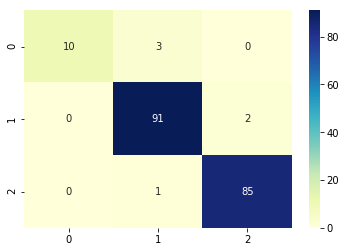

In [147]:
a=confusion_matrix(ytesto_cat, ytest_predict_neurona_overcatdf.Category)
sns.heatmap(a, annot=True, fmt="d",  cmap="YlGnBu")

In [148]:
neurona_overcat_accuracy=accuracy_score(ytesto_cat, ytest_predict_neurona_overcatdf.Category)
neurona_overcat_accuracy

0.96875

## 7.4 Fitting and evaluating the model for heating

<a id="Deep24"></a>

### 7.4.1 Grid search to find best epoc and batch size for heating

In [149]:
ytrain3_vector=to_categorical(ytrain3)

In [150]:
def create_model():    
    #Defining the model
    model=Sequential()
    model.add(Dense(8, input_dim=8, activation="relu"))
    model.add(Dense(4, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    
    #Compiling the model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [151]:
# param_neurona3={"epochs":[10,50,100],
#               "batch_size":[10,20,50,100]}
# modelo=KerasClassifier(build_fn=create_model, verbose=0)

# grid_neurona3=GridSearchCV(modelo, param_neurona3, cv=5)
# grid_neurona3.fit(Xtrain3_mms, ytrain3_vector)

In [152]:
# grid_neurona3.best_params_

### 7.4.2 Running the best model for heating

In [153]:
neurona_cat.fit(Xtrain3_mms, ytrain3_vector,  epochs=50, batch_size=10)

Epoch 1/50
614/614 [==============================] - 0s 320us/step - loss: 0.4375 - acc: 0.8599
Epoch 2/50
614/614 [==============================] - 0s 354us/step - loss: 0.2658 - acc: 0.8779 0s - loss: 0.2843 - acc: 0.
Epoch 3/50
614/614 [==============================] - 0s 300us/step - loss: 0.2508 - acc: 0.8844
Epoch 4/50
614/614 [==============================] - 0s 352us/step - loss: 0.2442 - acc: 0.8974
Epoch 5/50
614/614 [==============================] - 0s 161us/step - loss: 0.2387 - acc: 0.9039
Epoch 6/50
614/614 [==============================] - 0s 277us/step - loss: 0.2325 - acc: 0.8990
Epoch 7/50
614/614 [==============================] - 0s 194us/step - loss: 0.2324 - acc: 0.8958
Epoch 8/50
614/614 [==============================] - 0s 245us/step - loss: 0.2262 - acc: 0.9072
Epoch 9/50
614/614 [==============================] - 0s 204us/step - loss: 0.2218 - acc: 0.8990
Epoch 10/50
614/614 [==============================] - 0s 155us/step - loss: 0.2221 - acc: 0.9007
E

### 7.4.3 Evaluating the model for heating

In [154]:
ytest_predict_neurona3=neurona_cat.predict(Xtest3_mms)
ytest_predict_neurona3

array([[2.43545976e-02, 9.74483371e-01, 1.16199604e-03],
       [1.76264672e-03, 8.07359159e-01, 1.90878183e-01],
       [9.24305260e-01, 5.58794737e-02, 1.98152456e-02],
       [4.42108721e-05, 9.99026775e-01, 9.29054804e-04],
       [7.20385990e-12, 9.56086162e-03, 9.90439057e-01],
       [9.24305260e-01, 5.58794737e-02, 1.98152456e-02],
       [3.73397840e-11, 9.99997854e-01, 2.13937938e-06],
       [8.10111700e-12, 6.16518687e-03, 9.93834853e-01],
       [9.24305260e-01, 5.58794737e-02, 1.98152456e-02],
       [1.09413089e-02, 9.88409400e-01, 6.49252790e-04],
       [3.38072685e-04, 9.98324692e-01, 1.33722066e-03],
       [9.24305260e-01, 5.58794737e-02, 1.98152456e-02],
       [8.14408452e-07, 2.77826041e-01, 7.22173154e-01],
       [2.81896858e-12, 3.02602630e-03, 9.96973991e-01],
       [1.03375663e-04, 7.57747829e-01, 2.42148831e-01],
       [1.13422804e-09, 7.23370491e-03, 9.92766261e-01],
       [4.58593604e-06, 9.99963164e-01, 3.22699525e-05],
       [3.12730111e-03, 9.96296

##### Transforming numpy array to a dataframe for categorical heating model

In [155]:
#First Step: Transforming to a dataframe
ytest3_predict_neurona3df=pd.DataFrame(ytest_predict_neurona3)
ytest3_predict_neurona3df=ytest3_predict_neurona3df.rename(columns={0:"value0", 1:"value1", 2:"value2"})
ytest3_predict_neurona3df['HighScore'] = ytest3_predict_neurona3df[["value0", "value1", "value2"]].apply(max, axis=1)
ytest3_predict_neurona3df.head()


,value0,value1,value2,HighScore
0,2.435460e-02,0.974483,0.001162,0.974483
1,1.762647e-03,0.807359,0.190878,0.807359
2,9.243053e-01,0.055879,0.019815,0.924305
3,4.421087e-05,0.999027,0.000929,0.999027
4,7.203860e-12,0.009561,0.990439,0.990439


#### Creating the predicted category based in probabilities for categorical heating model

In [156]:
#Creating a function to define one category
def f(row):
    if row['value0'] == row['HighScore']:
        val = 0
    elif row['value1'] == row['HighScore']:
        val = 1
    else:
        val = 2
    return val

In [157]:
ytest3_predict_neurona3df["Category"]=ytest3_predict_neurona3df.apply(f, axis=1)
ytest3_predict_neurona3df.Category.value_counts()

2    63
1    62
0    29
Name: Category, dtype: int64

#### Applying confussion matrices for categorical heating model

In [158]:
print(classification_report(ytest3, ytest3_predict_neurona3df.Category))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98        28
          1       0.90      0.92      0.91        61
          2       0.94      0.91      0.92        65

avg / total       0.93      0.93      0.93       154



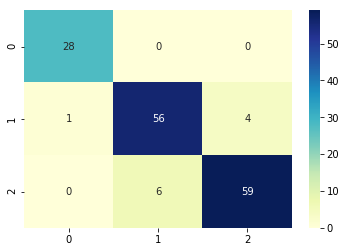

In [159]:
a=confusion_matrix(ytest3, ytest3_predict_neurona3df.Category)
sns.heatmap(a, annot=True, fmt="d",  cmap="YlGnBu")

In [160]:
neurona_heatingcat_accuracy=accuracy_score(ytest3, ytest3_predict_neurona3df.Category)
neurona_heatingcat_accuracy

0.9285714285714286

## 7.5 Fitting and evaluation the model for cooling

<a id="Deep25"></a>

### 7.5.1 Grid search to find best epoc and batch size for cooling

In [161]:
ytrain4_vector=to_categorical(ytrain4)

In [162]:
def create_model2():    
    #Defining the model
    model2=Sequential()
    model2.add(Dense(8, input_dim=8, activation="relu"))
    model2.add(Dense(4, activation="relu"))
    model2.add(Dense(3, activation="softmax"))
    
    #Compiling the model
    model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model2

In [163]:
# param_neurona4={"epochs":[10,50,100],
#               "batch_size":[10,20,50,100]}
# modelo4=KerasClassifier(build_fn=create_model2, verbose=0)

# grid_neurona4=GridSearchCV(modelo4, param_neurona4, cv=5)
# grid_neurona4.fit(Xtrain4_mms, ytrain4_vector)

In [164]:
# grid_neurona4.best_params_

### 7.5.2 Running the best model for cooling

In [165]:
neurona_cat.fit(Xtrain4_mms, ytrain4_vector,  epochs=100, batch_size=10)

Epoch 1/100
614/614 [==============================] - 0s 304us/step - loss: 0.3480 - acc: 0.8616
Epoch 2/100
614/614 [==============================] - 0s 318us/step - loss: 0.1795 - acc: 0.9349
Epoch 3/100
614/614 [==============================] - 0s 348us/step - loss: 0.1100 - acc: 0.9625
Epoch 4/100
614/614 [==============================] - 0s 315us/step - loss: 0.0873 - acc: 0.9707
Epoch 5/100
614/614 [==============================] - 0s 325us/step - loss: 0.0778 - acc: 0.9788
Epoch 6/100
614/614 [==============================] - 0s 316us/step - loss: 0.0729 - acc: 0.9805
Epoch 7/100
614/614 [==============================] - 0s 313us/step - loss: 0.0672 - acc: 0.9853
Epoch 8/100
614/614 [==============================] - 0s 331us/step - loss: 0.0634 - acc: 0.9837
Epoch 9/100
614/614 [==============================] - 0s 327us/step - loss: 0.0596 - acc: 0.9870
Epoch 10/100
614/614 [==============================] - 0s 302us/step - loss: 0.0565 - acc: 0.9870
Epoch 11/100
614/61

614/614 [==============================] - 0s 285us/step - loss: 0.0299 - acc: 0.9821
Epoch 84/100
614/614 [==============================] - 0s 250us/step - loss: 0.0307 - acc: 0.9821
Epoch 85/100
614/614 [==============================] - 0s 326us/step - loss: 0.0301 - acc: 0.9821
Epoch 86/100
614/614 [==============================] - 0s 317us/step - loss: 0.0300 - acc: 0.9805
Epoch 87/100
614/614 [==============================] - 0s 341us/step - loss: 0.0298 - acc: 0.9837
Epoch 88/100
614/614 [==============================] - 0s 332us/step - loss: 0.0296 - acc: 0.9821
Epoch 89/100
614/614 [==============================] - ETA: 0s - loss: 0.0320 - acc: 0.982 - 0s 324us/step - loss: 0.0297 - acc: 0.9837
Epoch 90/100
614/614 [==============================] - 0s 324us/step - loss: 0.0296 - acc: 0.9837
Epoch 91/100
614/614 [==============================] - 0s 320us/step - loss: 0.0298 - acc: 0.9837
Epoch 92/100
614/614 [==============================] - 0s 215us/step - loss: 0.0303

### 7.5.3 Evaluating the model for cooling

In [166]:
ytest_predict_neurona4=neurona_cat.predict(Xtest4_mms)
ytest_predict_neurona4

array([[2.8706492e-05, 9.9995816e-01, 1.3070119e-05],
       [6.9261790e-05, 1.0659392e-01, 8.9333683e-01],
       [1.0233943e-07, 9.9999988e-01, 1.5389707e-08],
       [1.9369144e-12, 1.0000000e+00, 9.8067483e-09],
       [8.8184989e-18, 1.2591732e-04, 9.9987411e-01],
       [1.3503754e-03, 9.9859577e-01, 5.3819869e-05],
       [2.3037185e-18, 1.0000000e+00, 2.5619859e-11],
       [3.0462630e-17, 1.0844779e-04, 9.9989152e-01],
       [1.4303751e-04, 9.9985027e-01, 6.7273490e-06],
       [3.1597304e-04, 9.9967003e-01, 1.4017429e-05],
       [3.4916765e-14, 1.0000000e+00, 3.9661915e-10],
       [1.8852706e-04, 9.9980277e-01, 8.6881382e-06],
       [4.2117230e-09, 9.1638707e-04, 9.9908364e-01],
       [1.1749097e-18, 1.2461403e-05, 9.9998748e-01],
       [1.2246790e-11, 1.6504885e-03, 9.9834955e-01],
       [9.0483922e-15, 4.5850178e-05, 9.9995410e-01],
       [6.8647540e-13, 1.0000000e+00, 1.8856854e-10],
       [1.3766536e-09, 1.0000000e+00, 2.2690049e-08],
       [2.3778830e-11, 1.275

##### Transforming numpy array to a dataframe for categorical cooling model

In [167]:
#First Step: Transforming to a dataframe
ytest4_predict_neurona4df=pd.DataFrame(ytest_predict_neurona4)
ytest4_predict_neurona4df=ytest4_predict_neurona4df.rename(columns={0:"value0", 1:"value1", 2:"value2"})
ytest4_predict_neurona4df['HighScore'] = ytest4_predict_neurona4df[["value0", "value1", "value2"]].apply(max, axis=1)
ytest4_predict_neurona4df.head()

,value0,value1,value2,HighScore
0,2.870649e-05,0.999958,1.307012e-05,0.999958
1,6.926179e-05,0.106594,8.933368e-01,0.893337
2,1.023394e-07,1.000000,1.538971e-08,1.000000
3,1.936914e-12,1.000000,9.806748e-09,1.000000
4,8.818499e-18,0.000126,9.998741e-01,0.999874


#### Creating the predicted category based in probabilities for categorical cooling model

In [168]:
ytest4_predict_neurona4df["Category"]=ytest4_predict_neurona4df.apply(f, axis=1)
ytest4_predict_neurona4df.Category.value_counts()

2    75
1    75
0     4
Name: Category, dtype: int64

#### Applying confussion matrices for categorical cooling model

In [169]:
print(classification_report(ytest4, ytest4_predict_neurona4df.Category))

             precision    recall  f1-score   support

          0       0.75      0.75      0.75         4
          1       0.97      0.94      0.95        78
          2       0.95      0.99      0.97        72

avg / total       0.96      0.95      0.95       154



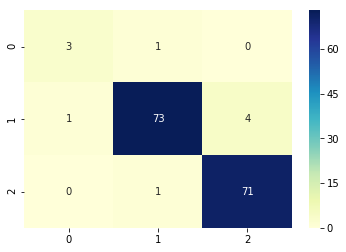

In [170]:
b=confusion_matrix(ytest4, ytest4_predict_neurona4df.Category)
sns.heatmap(b, annot=True, fmt="d",  cmap="YlGnBu")

In [171]:
neurona_coolingcat_accuracy=accuracy_score(ytest4, ytest4_predict_neurona4df.Category)
neurona_coolingcat_accuracy

0.9545454545454546

## 8. Final Report and Conclusions

<a id="Final"></a>

## 8.1 Comparing algoritms with continuos dependent variable
<a id="Final1"></a>

In [172]:
Regression_models_heating_test=[]
Regression_models_cooling_test=[]
Regression_models_overall_test=[]

Regression_models_heating_test.append(linreg_heating.score(Xtest_mms, ytest))
Regression_models_heating_test.append(lasso_heating.score(Xtest_mms, ytest))
Regression_models_heating_test.append(randomforest_heating.score(Xtest_mms, ytest))
Regression_models_heating_test.append(adalasso_heating.score(Xtest_mms, ytest))
Regression_models_heating_test.append(r2_score(ytest, ytestpredict_neurona_heating))

#For cooling load
Regression_models_cooling_test.append(linreg_cooling.score(Xtest2_mms, ytest2))
Regression_models_cooling_test.append(lasso_cooling.score(Xtest2_mms, ytest2))
Regression_models_cooling_test.append(randomforest_cooling.score(Xtest2_mms, ytest2))
Regression_models_cooling_test.append(adalasso_cooling.score(Xtest2_mms, ytest2))
Regression_models_cooling_test.append(r2_score(ytest2, ytestpredict_neurona_cooling))

#For overall load
Regression_models_overall_test.append(linreg_overall.score(Xtesto_mms, ytesto))
Regression_models_overall_test.append(lasso_overall.score(Xtesto_mms, ytesto))
Regression_models_overall_test.append(randomforest_overall.score(Xtesto_mms, ytesto))
Regression_models_overall_test.append(adalasso_overall.score(Xtesto_mms, ytesto))
Regression_models_overall_test.append(r2_score(ytesto, ytestpredict_neurona_overall))

In [173]:
indice=["Heating Load", "Cooling Load", "Overall Load"]
comparativo1=pd.DataFrame([Regression_models_heating_test, Regression_models_cooling_test, Regression_models_overall_test],
            index=indice, columns=["LinReg", "Lasso", "RandomForest", "AdaboostLasso", "DeepLearning"])

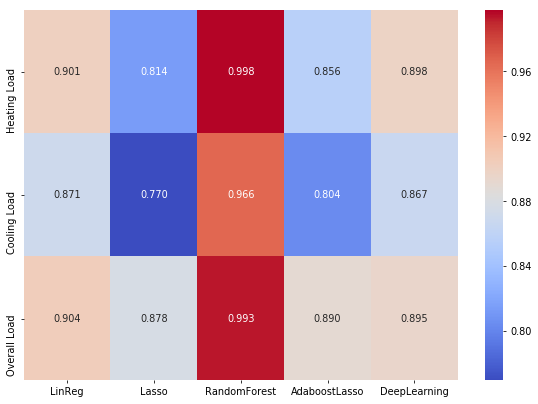

In [174]:
plt.figure(figsize=(10,7), dpi=70)
sns.heatmap(comparativo1, annot=True, fmt=".3f", cmap="coolwarm")

## 8.2 Comparing algoritms with categorical dependent variable
<a id="Final2"></a>

In [175]:
Classification_models_heating_test=[]
Classification_models_cooling_test=[]
Classification_models_overall_test=[]

#For heating Load
Classification_models_heating_test.append(best_tree_test_heat) #Decision Tree
Classification_models_heating_test.append(svr_heat_class.score(Xtest3_mms, ytest3)) #Support vector classification
Classification_models_heating_test.append(randomforest_heat_class.score(Xtest3_mms, ytest3)) #RandomForest
Classification_models_heating_test.append(GBM_heat_class.score(Xtest3_mms, ytest3)) #Gradient Boosting
Classification_models_heating_test.append(neurona_overcat_accuracy)

#For cooling load
Classification_models_cooling_test.append(best_tree_test_cool) #Decision Tree
Classification_models_cooling_test.append(svr_cool_class.score(Xtest4_mms, ytest4)) #Support vector classification
Classification_models_cooling_test.append(randomforest_cool_class.score(Xtest4_mms, ytest4)) #random Forest
Classification_models_cooling_test.append(GBM_cool_class.score(Xtest4_mms, ytest4)) #Gradient Boosting
Classification_models_cooling_test.append(neurona_heatingcat_accuracy)

#For overall load
Classification_models_overall_test.append(best_tree_test_overall) #Decision Tree
Classification_models_overall_test.append(svr_overall_class.score(Xtesto_cat_mms, ytesto_cat)) #Support Vector Classification
Classification_models_overall_test.append(randomforest_heat_class.score(Xtesto_cat_mms, ytesto_cat)) #Random Forest 
Classification_models_overall_test.append(GBM_heat_class.score(Xtesto_cat_mms, ytesto_cat)) #Gradient Boosting
Classification_models_overall_test.append(neurona_coolingcat_accuracy)

In [176]:
indice=["Heating Load", "Cooling Load", "Overall Load"]
comparativo2=pd.DataFrame([Classification_models_heating_test, Classification_models_cooling_test, Classification_models_overall_test],
            index=indice, columns=["DecisionTree", "SVC", "RandomForest", "GradientBoosting", "DeepLearning"])

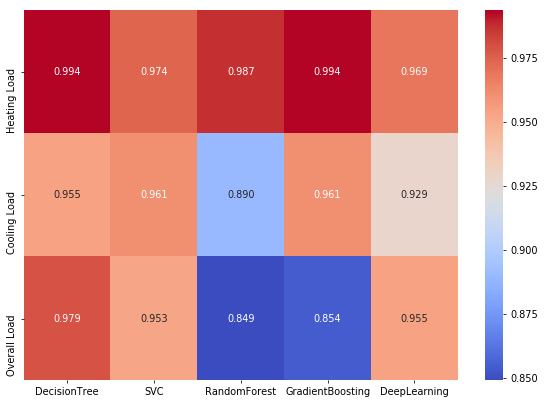

In [177]:
plt.figure(figsize=(10,7), dpi=70)
sns.heatmap(comparativo2, annot=True, fmt=".3f", cmap="coolwarm")

## 8.3 Compare R2 score with bagging
<a id="Final3"></a>

In [178]:
bag

,Model,Train Score,Test Score,oob_score,Test(Bagging)
0,Tree Heat,0.980456,0.993506,0.920195,0.993506
1,Tree Cool,0.995114,0.954545,0.985342,0.967532
2,Tree Overall,0.991319,0.979167,0.989583,0.979167
3,SVM Heat,0.978827,0.974026,0.941368,0.974026
4,SVM Cool,0.988599,0.961039,0.978827,0.954545
5,SVM Overall,0.984375,0.953125,0.963542,0.963542


The validation scores improve slightly after applied Bagging ensemble algorithm

## 8.4 Conclusions
<a id="Final4"></a>

We've worked with different models using the variables heating load, cooling load and overall load as dependent variables. For regression models we've treated as continuos variables and for classification models we've created three categories (low, medium and high). 

For the regression models, we can see in section 8.1 that the best performance is Random Forest Regression algorithm. The R2 for test set ranges between 0.96 to 0.99. Even so, the multiperceptron algorithm showed a good performance. The R2 for test set ranges between 0.87-0.90.

For the classification models, we can see in section 8.2 that all models show a high performance. The multiperceptron algorithm shows an accuracy superior to 0.90 for heating, cooling and overall load.

## Effort Table

* Team Member 1: Minoru Ronny Maeshiro | 100%
* Team Member 2: Lan Wei | 100%